<a href="https://colab.research.google.com/github/tdhoang0111/Coursera-test/blob/main/_8_module_4_b_risks_vs_returns_backtesting_pt5_l8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Dữ liệu thực hành

In [ ]:
!pip install vnstock

### Đồ thị nến

In [ ]:
!pip install vnstock3

In [ ]:
import os
import pandas as pd
if "ACCEPT_TC" not in os.environ:
    os.environ["ACCEPT_TC"] = "tôi đồng ý"

from vnstock3 import Vnstock

stock = Vnstock().stock(symbol='FRT', source='VCI')

candle_df = stock.quote.history(start='2020-01-01', end='2024-05-25')
candle_df['time'] = pd.to_datetime(candle_df['time'])
candle_df.set_index('time', inplace=True)
candle_df

2024-06-23 08:22:56,088 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,open,high,low,close,volume
time,,,,,
2020-01-02,11.57,11.98,11.57,11.98,45800
2020-01-03,11.87,12.78,11.87,12.48,25600
2020-01-06,12.48,12.48,11.98,12.09,53810
2020-01-07,12.17,12.17,11.98,12.04,39120
2020-01-08,12.04,12.04,11.68,11.71,54500
...,...,...,...,...,...
2024-05-20,169.00,170.90,164.60,164.60,996300
2024-05-21,164.00,164.60,161.30,164.00,828000
2024-05-22,163.90,164.50,160.50,162.00,833900


In [ ]:
index_df = stock.quote.history(symbol='VNINDEX', start='2020-01-01', end='2024-05-25')
index_df['time'] = pd.to_datetime(index_df['time'])
index_df.set_index('time', inplace=True)
index_df

,open,high,low,close,volume
time,,,,,
2020-01-02,960.26,966.67,959.67,966.67,131523160
2020-01-03,968.72,970.88,965.14,965.14,149202550
2020-01-06,962.79,963.20,955.59,955.79,140978550
2020-01-07,955.39,959.46,953.19,958.88,130272030
2020-01-08,954.13,955.84,945.28,948.98,179374340
...,...,...,...,...,...
2024-05-20,1281.52,1285.19,1277.36,1277.58,1161563296
2024-05-21,1278.44,1281.29,1267.29,1277.14,972159800
2024-05-22,1280.47,1283.06,1263.87,1266.91,1139091754


# II. Rủi ro & lợi nhuận

> Nắm kiến thức cơ sở về phân tích Rủi ro lợi nhuận thông qua bài tóm tắt [tại đây](https://knowledge.sapp.edu.vn/knowledge/t%E1%BB%95ng-h%E1%BB%A3p-ki%E1%BA%BFn-th%E1%BB%A9c-chung-c%E1%BB%A7a-reading-51-portfolio-management-an-overview) là nội dung đào tạo từ chương trình CFA level 1.

Để tính toán các chỉ số thống kê và lợi nhuận, có một số lựa chọn về thư viện Python nổi bật như sau:

* [Empyrical](https://github.com/quantopian/empyrical) từ Quantopian chuyên phát triển công cụ nghiên cứu & backtest, cung cấp các thư viên như zipline, pyfolio
* [Quantstats](https://github.com/ranaroussi/quantstats) từ Ran Aroussi, tác giả của thư viện yfinance.

Dưới đây, chúng ta cùng làm quen một số chỉ số tính toán thông dụng khi đo lường rủi ro và lợi nhuận của khoản đầu tư và cách thực hiện trong python.

| Chỉ số | Mô Tả | Công Dụng | Link Tham Khảo |
|:--------|-------|-----------|----------------|
| Tổng Lợi Nhuận (Total Return) | Tính tổng lợi nhuận của một khoản đầu tư, không điều chỉnh cho rủi ro hay thời gian. | Đánh giá lợi ích tổng thể từ việc đầu tư. | [Investopedia](https://www.investopedia.com/terms/t/totalreturn.asp) |
| Sharpe Ratio | Tỷ số Sharpe đo lường lợi nhuận điều chỉnh theo rủi ro của một khoản đầu tư so với lợi nhuận không rủi ro. | Đánh giá mức độ hiệu quả của việc đầu tư dựa trên rủi ro. | [Investopedia](https://www.investopedia.com/terms/s/sharperatio.asp) |
| Sortino Ratio | Tương tự như Sharpe Ratio nhưng chỉ tính toán sự biến động tiêu cực. | Đánh giá hiệu quả đầu tư mà không bị ảnh hưởng bởi biến động tích cực. | [Investopedia](https://www.investopedia.com/terms/s/sortinoratio.asp) |
| Alpha | Đo lường hiệu suất của một khoản đầu tư so với một chỉ số tham chiếu (benchmark), sau khi đã điều chỉnh cho rủi ro. | Xác định khả năng tạo ra lợi nhuận vượt trội so với thị trường. | [Investopedia](https://www.investopedia.com/terms/a/alpha.asp) |
| Beta | Đo lường mức độ phản ứng của giá cổ phiếu so với thị trường chung. | Đánh giá mức độ rủi ro thị trường của một cổ phiếu. | [Investopedia](https://www.investopedia.com/terms/b/beta.asp) |
| Volatility (Độ Biến Động) | Tính toán độ biến động của lợi nhuận của một khoản đầu tư. | Đánh giá mức độ rủi ro của một khoản đầu tư. | [Investopedia](https://www.investopedia.com/terms/v/volatility.asp) |
| Max Drawdown (Mức giảm tối đa) | Đo lường sự giảm giá lớn nhất từ đỉnh đến đáy trước khi đạt đến một đỉnh mới. | Xác định mức độ thua lỗ tối đa có thể xảy ra. | [Investopedia](https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp) |
| Compound Annual Growth Rate (CAGR) | Tính tỷ lệ tăng trưởng hàng năm hợp chất trên một khoản đầu tư. | Đánh giá lợi nhuận trung bình hàng năm. | [Investopedia](https://www.investopedia.com/terms/c/cagr.asp) |
| Omega Ratio | Tính tỷ số giữa lợi nhuận vượt quá một mức lợi nhuận mục tiêu so với tổn thất dưới mức đó. | Đánh giá khả năng đạt được lợi nhuận cao hơn một ngưỡng nhất định. | [Investopedia](https://www.investopedia.com/terms/o/omegaratio.asp) |
| Calmar Ratio | Tỷ lệ giữa CAGR và lỗ lớn nhất. | Đánh giá lợi nhuận của một khoản đầu tư so với rủi ro của nó. | [Investopedia](https://www.investopedia.com/terms/c/calmarratio.asp) |


Khi áp dụng lãi suất ngân hàng (hàng năm) hoặc lợi nhuận đầu tư kỳ vọng (hàng năm) vào công thức tính toán lưu ý sự khác nhau giữa kỳ tính toán. Để chuyển đổi về mức lãi suất ngày.

$$
\text{Daily Rate} = (1 + \text{Annual Rate})^{\frac{1}{252}} - 1
$$

In [ ]:
annual_risk_free_rate = 0.047  # Lãi suất tiết kiệm Vietcombank kỳ hạn 1 năm ngày 30/3/2024 là 4.7%
annual_required_return = 0.1  # Lợi nhuận kỳ vọng, ví dụ 10% (trên mức lãi suất tiết kiệm)
daily_risk_free_rate = (1 + annual_risk_free_rate)**(1/252) - 1
daily_required_return = (1 + annual_required_return)**(1/252) - 1

<font color='blue'><strong>Lưu ý:</strong></font>

> Phần demo dưới đây cho thư viện Empyrical và Quantstats thể hiện các thống kê về rủi ro và lợi nhuận trong phân tích chứng khoán với chiến thuật mua và nắm giữ.

### Empyrical

In [ ]:
!pip install empyrical

In [ ]:
import pandas as pd
import empyrical as ep
import numpy as np

# Giả sử `candle_df` chứa giá đóng cửa hàng ngày của cổ phiếu và `index_df` chứa giá đóng cửa hàng ngày của VNINDEX

# Tính series lợi nhuận nắm giữ hàng ngày (giả sử thời điểm mua và kết thúc tương ứng với DataFrame hiện có)
returns = candle_df['close'].pct_change(periods=1).dropna()

# Sử dụng VNINDEX là tham chiếu khi so sánh lợi nhuận
benchmark_returns = index_df['close'].pct_change(periods=1).dropna()

# Tính tổng lợi nhuận cuối cùng
total_return = ep.cum_returns_final(returns=returns)

# Tính lợi nhuận quy về hàng năm
annual_return = ep.annual_return(returns=returns, period='daily')

# Tính độ biến động hàng năm. Dựa trên giả định phân phối lợi nhuận là chuẩn (hình chuông - bell curve).
annual_volatility = ep.annual_volatility(returns=returns, period='daily')

# Tính Sharpe Ratio, chỉ số đánh giá hiệu suất đầu tư so với rủi ro. Số ngày quy đổi sang lợi nhuận năm là 252
sharpe_ratio = ep.sharpe_ratio(returns=returns, risk_free=daily_risk_free_rate, period='daily')

# Tính Sortino Ratio, phiên bản cải tiến của Sharpe Ratio, chỉ tính đến sự biến động tiêu cực
sortino_ratio = ep.sortino_ratio(returns=returns, required_return=daily_required_return, period='daily')

# Tính mức giảm giá tối đa
max_drawdown = ep.max_drawdown(returns=returns)

# Tính Tỷ lệ Tăng trưởng Hợp chất Hàng năm (CAGR)
cagr = ep.cagr(returns=returns, period='daily')

# Tính Alpha và Beta so với VNINDEX, đo lường hiệu suất so với thị trường và mức độ phản ứng của cổ phiếu với thị trường
alpha, beta = ep.alpha_beta(returns=returns, factor_returns=benchmark_returns, risk_free=daily_risk_free_rate, period='daily')

# Tính Omega
omega_ratio = ep.omega_ratio(
    returns=returns,
    risk_free=daily_risk_free_rate,
    required_return=daily_required_return
)

calma_ratio = ep.calmar_ratio(returns, period='daily')

metrics = {
    "Total Return": total_return,
    "Annualized Return": annual_return,
    "Annualized Volatility": annual_volatility,
    "Sharpe Ratio": sharpe_ratio,
    "Sortino Ratio": sortino_ratio,
    "Max Drawdown": max_drawdown,
    "CAGR": cagr,
    'Alpha': alpha,
    'Beta' : beta,
    'Omgea': omega_ratio,
    'Calmar Ratio': calma_ratio
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Set the index to the 'Metric' column for better presentation
metrics_df.set_index('Metric', inplace=True)

# Print the DataFrame
print(metrics_df.to_markdown())

| Metric                |     Value |
|:----------------------|----------:|
| Total Return          |  6.12602  |
| Annualized Return     |  0.23879  |
| Annualized Volatility |  0.327267 |
| Sharpe Ratio          |  0.677601 |
| Sortino Ratio         |  0.779756 |
| Max Drawdown          | -0.552122 |
| CAGR                  |  0.23879  |
| Alpha                 |  0.172061 |
| Beta                  |  0.979811 |
| Omgea                 |  1.12592  |
| Calmar Ratio          |  0.432494 |


| Chỉ Số                  | Giá Trị   | Ý Nghĩa |
:-------------------------|-----------|:---------|
| Tổng Lợi Nhuận          | 6.12602   | Đây là tổng lợi nhuận thu được từ chiến lược, thể hiện lợi nhuận đã tăng lên gấp 6 lần so với vốn ban đầu. |
| Lợi Nhuận Hàng Năm      | 0.23879   | Cho biết lợi nhuận trung bình hàng năm, sau khi điều chỉnh theo thời gian, tương đương với mức tăng trưởng 23.879% hàng năm. |
| Độ Biến Động Hàng Năm   | 0.327267  | Đo lường mức độ biến động của lợi nhuận hàng năm, với giá trị này phản ánh mức độ rủi ro tương đối cao của chiến lược. |
| Sharpe Ratio            | 0.677601  | Chỉ số này đo lường hiệu suất điều chỉnh rủi ro của chiến lược, với mỗi đơn vị rủi ro mang lại 0.677 lợi nhuận. |
| Sortino Ratio           | 0.779756  | Tương tự Sharpe Ratio, nhưng Sortino Ratio chỉ tính đến sự biến động tiêu cực của lợi nhuận, không xét đến biến động tích cực. Như vậy, nó cung cấp cái nhìn sâu sắc hơn về hiệu suất của chiến lược trong điều kiện thị trường xấu, giá trị này cho thấy chiến lược có hiệu suất tốt hơn khi chỉ xem xét rủi ro tiêu cực. |
| Mức Giảm Tối Đa (Max Drawdown)     | -0.552122 | Phản ánh mức giảm lớn nhất từ đỉnh tới đáy của chiến lược, cho thấy chiến lược đã mất hơn 55% giá trị tại thời điểm xấu nhất. |
| CAGR                    | 0.23879   | Tỷ lệ Tăng trưởng Hợp chất Hàng năm, cho biết chiến lược tăng trưởng trung bình 23.879% mỗi năm. |
| Alpha                   | 0         | Alpha bằng 0 cho thấy chiến lược không tạo ra lợi nhuận vượt trội so với mức độ rủi ro đã chấp nhận. |
| Beta                    | 1         | Beta bằng 1 cho biết chiến lược có mức độ phản ứng với thị trường tương đương với chỉ số tham chiếu, tức là di chuyển cùng với thị trường. |
| Omega                   | 1.12592   | Omega Ratio lớn hơn 1 cho thấy lợi nhuận thu được trên mức lợi nhuận mong đợi là tích cực, phản ánh khả năng sinh lời tốt của chiến lược so với mức rủi ro đã chấp nhận. |

Tham khảo giải thích cụ thể cho các loại rủi ro trong đầu tư [tại đây](https://sapp.edu.vn/bai-viet-cfa/cac-loai-rui-ro-trong-dau-tu-tai-chinh/)

### Quantstats

In [ ]:
!pip install quantstats

In [ ]:
import quantstats as qs
qs.reports.metrics(candle_df['close'])

                    Strategy
------------------  ------------------------
Start Period        2015-01-05
End Period          2024-03-22
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   -100.0%
CAGR﹪              15.85%

Sharpe              0.82
Prob. Sharpe Ratio  99.45%
Sortino             1.23
Sortino/√2          0.87
Omega               1.15

Max Drawdown        -55.21%
Longest DD Days     1068

Gain/Pain Ratio     0.15
Gain/Pain (1M)      0.99

Payoff Ratio        1.14
Profit Factor       -
Common Sense Ratio  1.4
CPC Index           0.66
Tail Ratio          5.3
Outlier Win Ratio   2.39
Outlier Loss Ratio  -

MTD                 -1.6151923310579878e+18%
3M                  6.109053775778009e+18%
6M                  -5.950019326699531e+18%
YTD                 -8.559593309696958e+18%
1Y                  -5.083902667853605e+18%
3Y (ann.)           26.08%
5Y (ann.)           20.18%
10Y (ann.)          15.85%
All-time (ann.)     15.85%

Avg. Drawdown       -7.78%

#### Tính toán đơn lẻ

In [ ]:
%matplotlib inline
import quantstats as qs

# Giả sử `candle_df` chứa giá đóng cửa hàng ngày của cổ phiếu và `index_df` chứa giá đóng cửa hàng ngày của VNINDEX

# Tính series lợi nhuận nắm giữ hàng ngày (giả sử thời điểm mua và kết thúc tương ứng với DataFrame hiện có)
returns = candle_df['close'].pct_change(periods=1).dropna()

# Sử dụng VNINDEX là tham chiếu khi so sánh lợi nhuận
benchmark_returns = index_df['close'].pct_change(periods=1).dropna()

# Tính tổng lợi nhuận cuối cùng
total_return = qs.stats.comp(returns)

# Tính lợi nhuận quy về hàng năm
# annual_return = Không có hàm tương ứng

# Tính độ biến động hàng năm. Dựa trên giả định phân phối lợi nhuận là chuẩn (hình chuông - bell curve).
annual_volatility = qs.stats.volatility(returns, periods=252, annualize=True, prepare_returns=True)

# Tính Sharpe Ratio, chỉ số đánh giá hiệu suất đầu tư so với rủi ro. Số ngày quy đổi sang lợi nhuận năm là 252
sharpe_ratio = qs.stats.sharpe(candle_df['close'], rf=daily_risk_free_rate)

# Tính Sortino Ratio, phiên bản cải tiến của Sharpe Ratio, chỉ tính đến sự biến động tiêu cực
sortino_ratio = qs.stats.sortino(returns, rf=daily_risk_free_rate, periods=252, annualize=True, smart=False)

# Tính mức giảm giá tối đa
max_drawdown = qs.stats.max_drawdown(candle_df['close'])

# Tính Tỷ lệ Tăng trưởng Hợp chất Hàng năm (CAGR)
cagr = qs.stats.cagr(returns, rf=daily_risk_free_rate, compounded=True, periods=252)

# Tính Omega
# omega_ratio = qs.stats.omega(returns, rf=0.0, required_return=0.0, periods=252)

calma_ratio = qs.stats.calmar(returns, prepare_returns=True)

metrics = {
    "Total Return": total_return,
    "Annualized Return": 'Không có hàm tương ứng',
    "Annualized Volatility": annual_volatility,
    "Sharpe Ratio": sharpe_ratio,
    "Sortino Ratio": sortino_ratio,
    "Max Drawdown": max_drawdown,
    "CAGR": cagr,
    'Alpha': 'Không có hàm tương ứng',
    'Beta' : 'Không có hàm tương ứng',
    'Omgea': 'Có hàm nhưng đang lỗi',
    'Calmar Ratio': calma_ratio
}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])

# Set the index to the 'Metric' column for better presentation
metrics_df.set_index('Metric', inplace=True)

# Print the DataFrame
print(metrics_df.to_markdown())

| Metric                | Value                  |
|:----------------------|:-----------------------|
| Total Return          | 6.126019945602915      |
| Annualized Return     | Không có hàm tương ứng |
| Annualized Volatility | 0.3272673826498747     |
| Sharpe Ratio          | 0.8172204703260816     |
| Sortino Ratio         | 1.226982412378755      |
| Max Drawdown          | -0.5521222410865874    |
| CAGR                  | 0.1585278229530216     |
| Alpha                 | Không có hàm tương ứng |
| Beta                  | Không có hàm tương ứng |
| Omgea                 | Có hàm nhưng đang lỗi  |
| Calmar Ratio          | 0.28712450098194875    |


| Metric                | Empyrical Value | QuantStats Value         | Ghi chú                              |
|-----------------------|-----------------|--------------------------|--------------------------------------|
| Total Return          | 6.12602         | 6.126019945602915        | Cả hai giá trị gần như tương đương   |
| Annualized Return     | 0.23879         | Không có hàm tương ứng    | QuantStats không cung cấp trực tiếp  |
| Annualized Volatility | 0.327267        | 0.3272673826498747       | Cả hai giá trị gần như tương đương   |
| Sharpe Ratio          | 0.677601        | 0.8172204703260816       | QuantStats có thể sử dụng lãi suất không rủi ro khác |
| Sortino Ratio         | 0.779756        | 1.226982412378755        | QuantStats có thể sử dụng lãi suất không rủi ro khác |
| Max Drawdown          | -0.552122       | -0.5521222410865874      | Cả hai giá trị gần như tương đương   |
| CAGR                  | 0.23879         | 0.1585278229530216       | CAGR trong QuantStats được tính toán khác |
| Alpha                 | 0               | Không có hàm tương ứng    | QuantStats không cung cấp trực tiếp  |
| Beta                  | 1               | Không có hàm tương ứng    | QuantStats không cung cấp trực tiếp  |
| Omega                 | 1.12592         | Có hàm nhưng đang lỗi     | QuantStats gặp sự cố khi tính toán   |
| Calmar Ratio          | 0.432494        | 0.28712450098194875      | Calmar Ratio được tính toán khác nhau giữa hai thư viện |


#### Vẽ biểu đồ thống kê

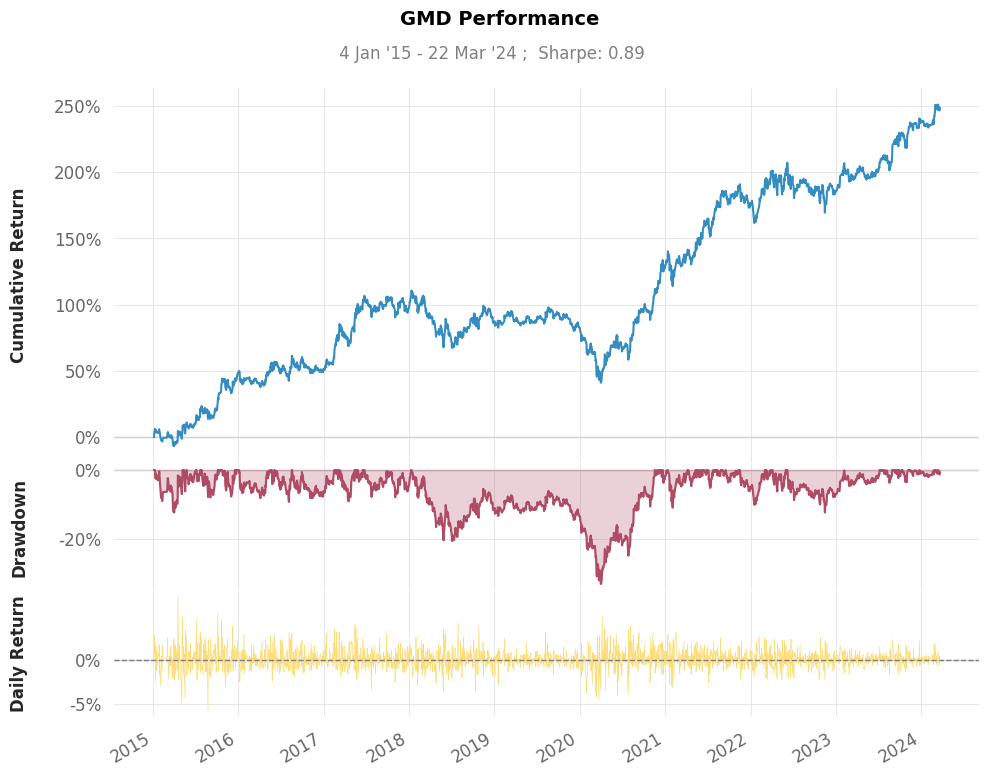

In [ ]:
qs.plots.snapshot(candle_df['close'], mode='full', title='GMD Performance', show=True)

#### Tạo báo cáo đầy đủ

In [ ]:
# qs.reports.html(candle_df['close'], title="GMD", output='test.html') #Tạo file báo cáo html

[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               2015-01-05
End Period                 2024-03-22
Risk-Free Rate             0.0%
Time in Market             92.0%

Cumulative Return          612.6%
CAGR﹪                     15.85%

Sharpe                     0.82
Prob. Sharpe Ratio         99.34%
Smart Sharpe               0.8
Sortino                    1.23
Smart Sortino              1.19
Sortino/√2                 0.87
Smart Sortino/√2           0.84
Omega                      1.15

Max Drawdown               -55.21%
Longest DD Days            1068
Volatility (ann.)          32.72%
Calmar                     0.29
Skew                       0.08
Kurtosis                   1.8

Expected Daily %           0.08%
Expected Monthly %         1.78%
Expected Yearly %          21.7%
Kelly Criterion            6.74%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.28%
Expected Shortfall (cVaR)  -3.28%

Max C

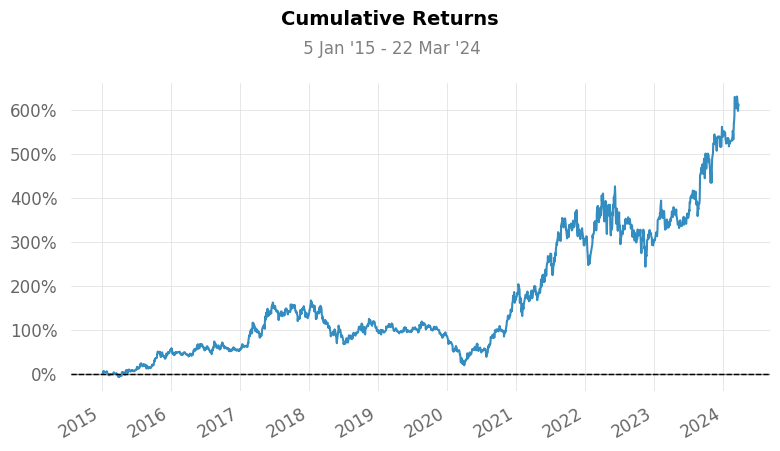

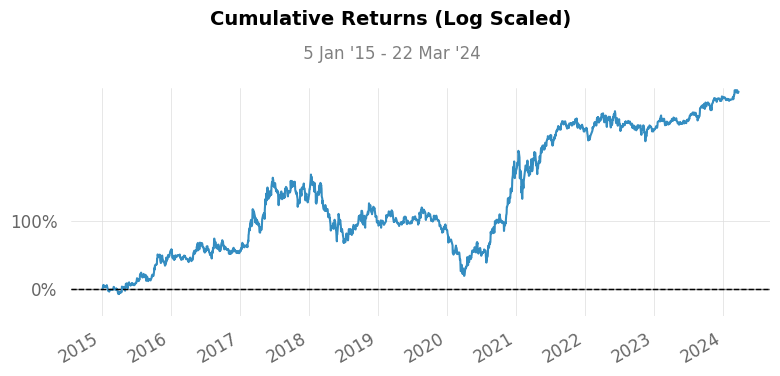

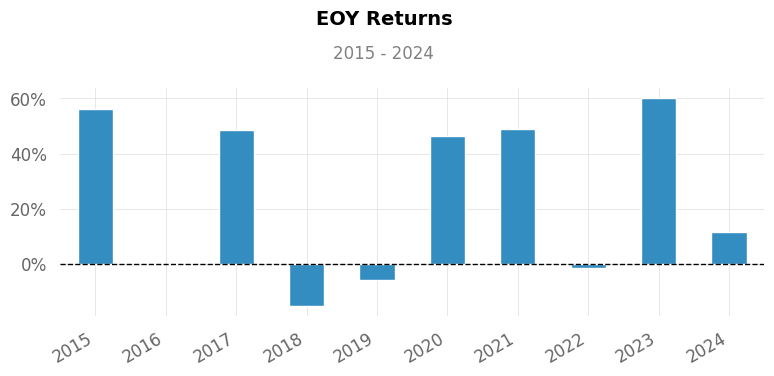

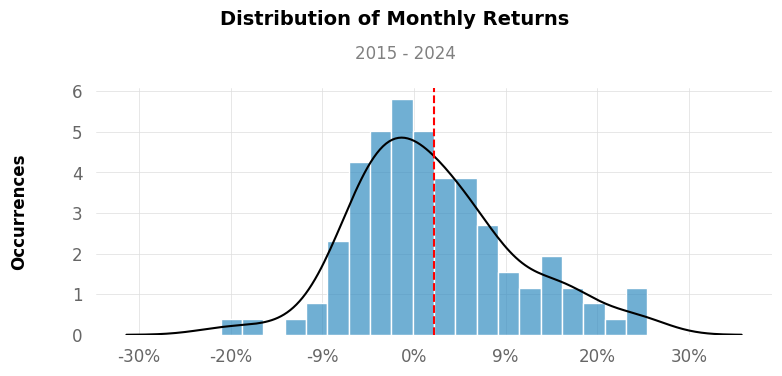

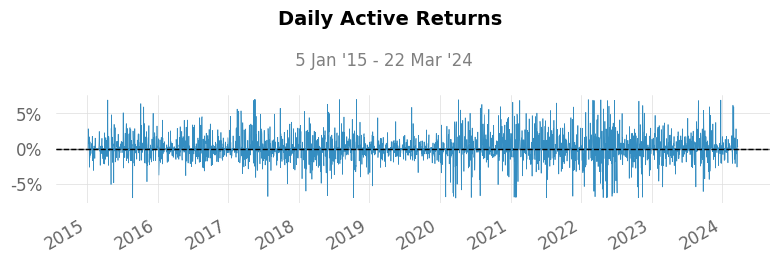

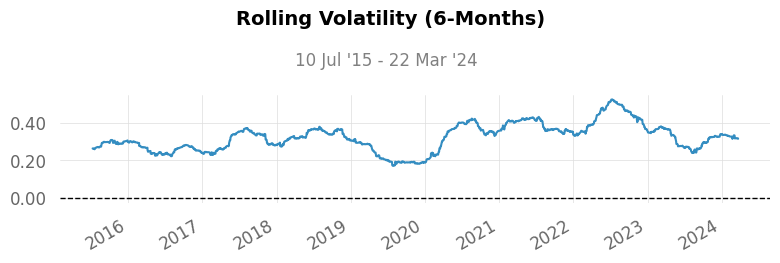

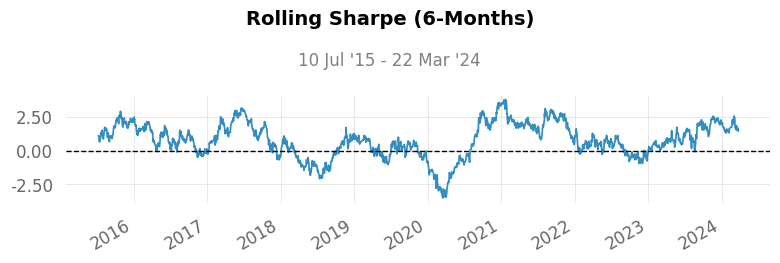

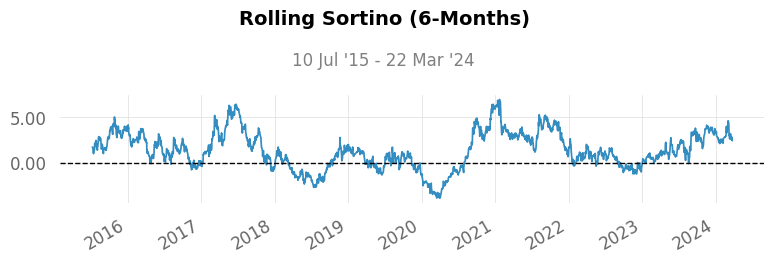

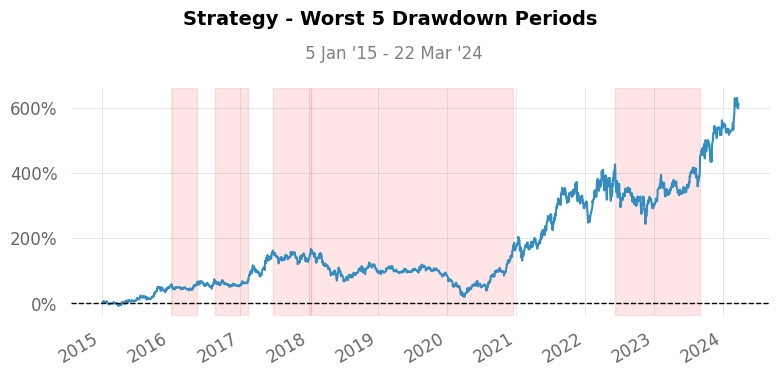

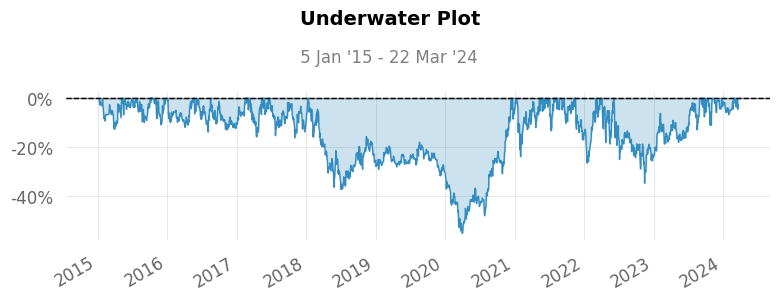

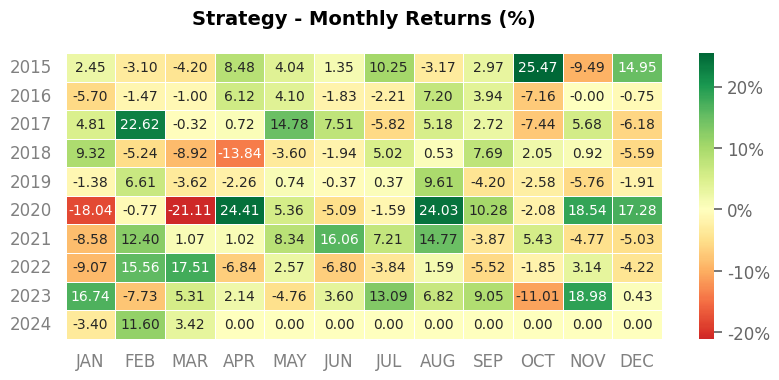

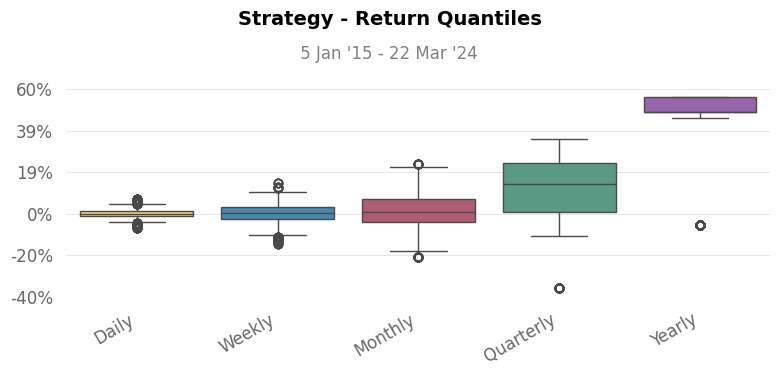

In [ ]:
# Tạo báo cá đầy đủ
qs.reports.full(candle_df['close'], title="GMD")

# III. Kiểm thử (Backtesting)

### I. Logic kiểm thử với dữ liệu vector (Series)

In [ ]:
!pip install pandas_ta
!pip install vnstock_ezchart

In [ ]:
import pandas_ta as pta
import numpy as np

data = candle_df[['close']].rename(columns={'close':'price'})
data['SMA1'] = pta.sma(data['price'], 50)
data['SMA2'] = pta.sma(data['price'], 200)

In [ ]:
from vnstock_ezchart import *

ezchart = MPlot()

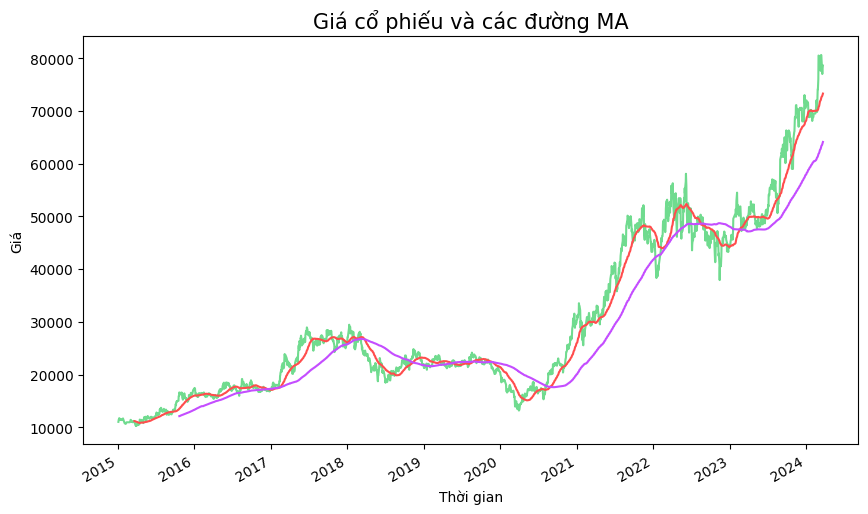

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Giá cổ phiếu và các đường MA'}, xlabel='Thời gian', ylabel='Giá'>)

In [ ]:
ezchart.timeseries(data, color_palette='stock',
                   title='Giá cổ phiếu và các đường MA', title_fontsize=15,
                   xlabel='Thời gian', ylabel='Giá',
                   figsize=(10, 6), background_color='white', grid=False)

In [ ]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

data.dropna(inplace=True) # Loại bỏ dữ liệu rỗng

In [ ]:
data

,price,SMA1,SMA2,position
time,,,,
2015-10-23,16620,13557.0,12117.450,1
2015-10-26,16280,13616.4,12143.700,1
2015-10-27,16280,13680.4,12168.400,1
2015-10-28,16280,13741.4,12192.350,1
2015-10-29,16280,13801.6,12215.900,1
...,...,...,...,...
2024-03-18,77900,72776.0,63552.485,1
2024-03-19,77000,72882.0,63690.185,1
2024-03-20,78000,73002.0,63830.985,1


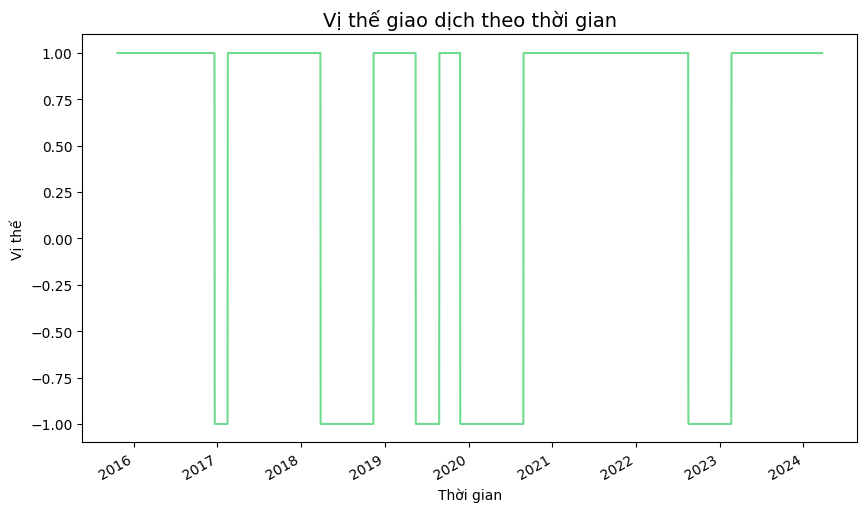

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Vị thế giao dịch theo thời gian'}, xlabel='Thời gian', ylabel='Vị thế'>)

In [ ]:
ezchart.timeseries(data['position'], color_palette='stock',
                   title='Vị thế giao dịch theo thời gian', title_fontsize=14,
                   xlabel='Thời gian', ylabel='Vị thế',
                   figsize=(10, 6), background_color='white', grid=False)

In [ ]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

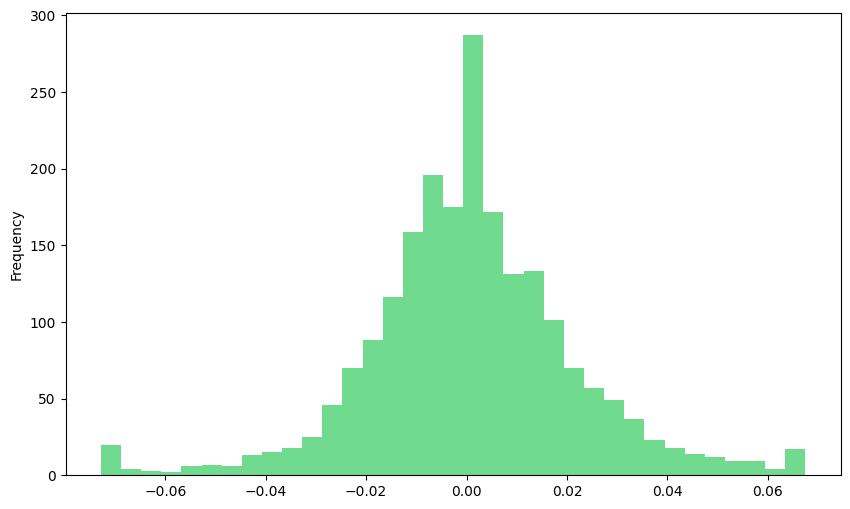

(<Figure size 1000x600 with 1 Axes>, <Axes: ylabel='Frequency'>)

In [ ]:
ezchart.hist(data['returns'], bins=35, figsize=(10, 6))

In [ ]:
data['strategy'] = data['position'].shift(1) * data['returns']

* `returns` đại diện cho lợi nhuận của thị trường hoặc tài sản cơ bản.

* `strategy` đại diện cho lợi nhuận của chiến lược đầu tư, đã được điều chỉnh dựa trên vị thế mua hoặc bán được xác định bởi hai đường trung bình động (SMA).

In [ ]:
data

,price,SMA1,SMA2,position,returns,strategy
time,,,,,,
2015-10-23,16620,13557.0,12117.450,1,NaN,NaN
2015-10-26,16280,13616.4,12143.700,1,-0.020669,-0.020669
2015-10-27,16280,13680.4,12168.400,1,0.000000,0.000000
2015-10-28,16280,13741.4,12192.350,1,0.000000,0.000000
2015-10-29,16280,13801.6,12215.900,1,0.000000,0.000000
...,...,...,...,...,...,...
2024-03-18,77900,72776.0,63552.485,1,-0.026601,-0.026601
2024-03-19,77000,72882.0,63690.185,1,-0.011621,-0.011621
2024-03-20,78000,73002.0,63830.985,1,0.012903,0.012903


In [ ]:
data[['returns', 'strategy']].sum() # Lợi nhuận log

returns     1.553765
strategy    1.136490
dtype: float64

In [ ]:
# Chuyển đổi lợi nhuận Lograit thành lợi nhuận (gross performance)
data[['returns', 'strategy']].sum().apply(np.exp)

returns     4.729242
strategy    3.115812
dtype: float64

`apply(np.exp)` áp dụng hàm mũ np.exp lên tổng lợi nhuận logarit. Hàm mũ (e^x) là phép toán ngược của logarit tự nhiên, giúp chuyển đổi lợi nhuận logarit trở lại thành lợi nhuận tuyệt đối (phần trăm lợi nhuận thực tế trên vốn đầu tư).

Việc sử dụng lợi nhuận logarit và sau đó chuyển đổi trở lại lợi nhuận tuyệt đối cho phép tính toán dễ dàng và chính xác các giá trị tổng hợp qua thời gian, đồng thời giữ được tính chất của lợi nhuận khi tái đầu tư.

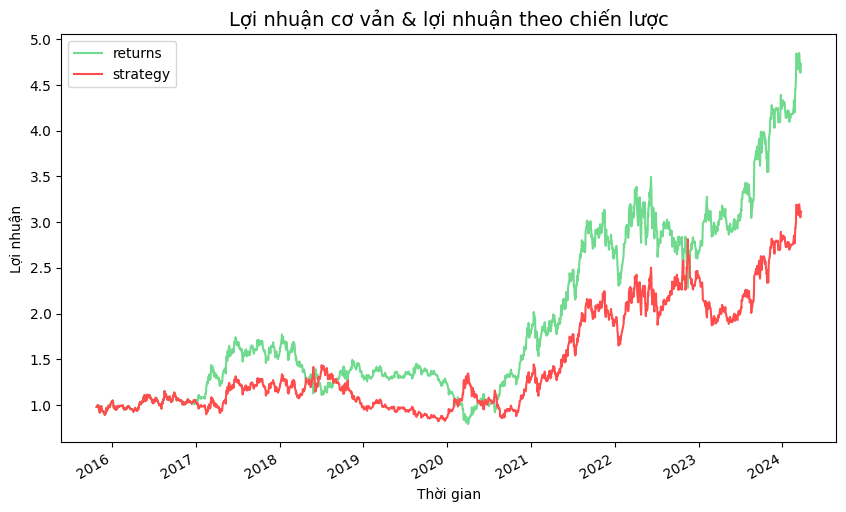

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Lợi nhuận cơ vản & lợi nhuận theo chiến lược'}, xlabel='Thời gian', ylabel='Lợi nhuận'>)

In [ ]:
return_to_plot = data[['returns', 'strategy']].dropna().cumsum(
            ).apply(np.exp)


ezchart.timeseries(return_to_plot, color_palette='stock',
                   title='Lợi nhuận cơ vản & lợi nhuận theo chiến lược', title_fontsize=14,
                   xlabel='Thời gian', ylabel='Lợi nhuận',
                   figsize=(10, 6), background_color='white', grid=False, show_legend=True)

In [ ]:
# Quy ra lợi nhuận trung bình theo năm
data[['returns', 'strategy']].mean() * 252

returns     0.185392
strategy    0.135604
dtype: float64

In [ ]:
# Quy ra lợi nhuận trung bình nhân theo năm (mũ 0.5 = khai căn)
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.330973
strategy    0.331069
dtype: float64

In [ ]:
# Tính lợi nhuận cộng dồn
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [ ]:
data

,price,SMA1,SMA2,position,returns,strategy,cumret
time,,,,,,,
2015-10-23,16620,13557.0,12117.450,1,NaN,NaN,NaN
2015-10-26,16280,13616.4,12143.700,1,-0.020669,-0.020669,0.979543
2015-10-27,16280,13680.4,12168.400,1,0.000000,0.000000,0.979543
2015-10-28,16280,13741.4,12192.350,1,0.000000,0.000000,0.979543
2015-10-29,16280,13801.6,12215.900,1,0.000000,0.000000,0.979543
...,...,...,...,...,...,...,...
2024-03-18,77900,72776.0,63552.485,1,-0.026601,-0.026601,3.088063
2024-03-19,77000,72882.0,63690.185,1,-0.011621,-0.011621,3.052386
2024-03-20,78000,73002.0,63830.985,1,0.012903,0.012903,3.092027


In [ ]:
# tính toán giá trị tối đa của gross performance theo thời gian
data['cummax'] = data['cumret'].cummax()

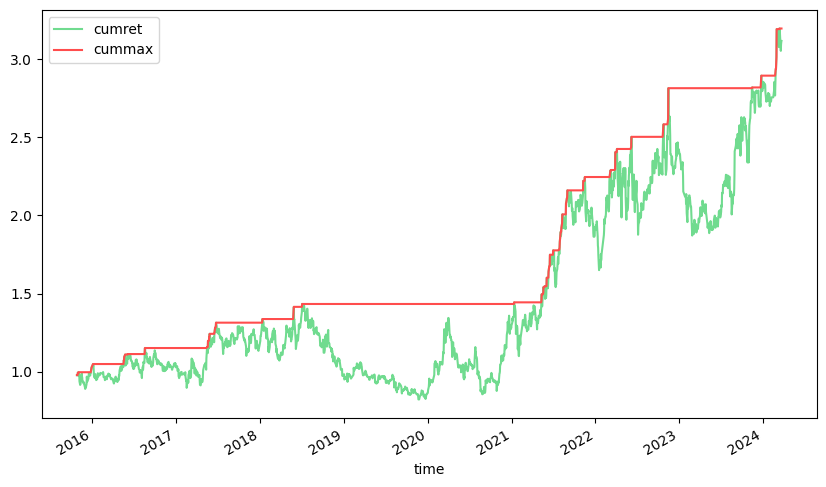

In [ ]:
# So sánh
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6));

In [ ]:
drawdown = data['cummax'] - data['cumret']

In [ ]:
# Tỉ lệ
drawdown.max()

0.9418506857576048

Xác định kỳ giảm dài nhất (Longest Drawdown period) xác định bằng cách so sánh giá trị `cumret` tức giá trị lợi nhuận cộng dồn bằng với giá trị lợi nhuận tối đa `cumax` có nghĩa là 1 đỉnh mới được xác lập. Giá trị này được lưu tạm vào 1 đối tượng temp. Giá trị này có thể là 1 ngày hoặc hơn 100 ngày, ở đây kỳ dài nhất là 924 ngày (~3 năm)

In [ ]:
temp = drawdown[drawdown == 0]

In [ ]:
periods = (temp.index[1:].to_pydatetime() -
           temp.index[:-1].to_pydatetime())

In [ ]:
periods.max()

datetime.timedelta(days=924)

### II. Tính toán lợi nhuận bằng Logarit

Lợi nhuận logarit (logarithmic return), hay còn gọi là lợi nhuận liên tục, là một cách để tính lợi nhuận của một khoản đầu tư mà có thể đơn giản hóa việc tính toán khi làm việc với các chuỗi thời gian dài và phức tạp. Lợi nhuận logarit được tính bằng cách sử dụng hàm logarit tự nhiên (ln) để đo lường tỷ lệ phần trăm thay đổi giữa giá cuối cùng và giá bắt đầu của một khoản đầu tư, dựa trên công thức sau:

$$\text{Lợi nhuận Logarit} = \ln \left( \frac{\text{Giá Cuối}}{\text{Giá Đầu}} \right)$$

Trong đó:
- $\ln$ là hàm logarit tự nhiên (cơ số $e$),
- $\text{Giá Cuối}$ là giá của tài sản tại thời điểm cuối,
- $\text{Giá Đầu}$ là giá của tài sản tại thời điểm bắt đầu.

#### Ví dụ minh họa:
Giả sử bạn mua cổ phiếu với giá `$100` và bán nó với giá `$110`. Lợi nhuận logarit được tính như sau:

$$\text{Lợi nhuận Logarit} = \ln \left( \frac{110}{100} \right) = \ln(1.1) \approx 0.0953$$

#### Lý do sử dụng Lợi nhuận Logarit:
1. **Tính Đồng Nhất**: Lợi nhuận logarit có thể cộng lại một cách đơn giản qua nhiều khoảng thời gian, giúp đơn giản hóa phân tích chuỗi thời gian và so sánh lợi nhuận qua các khoảng thời gian khác nhau.
2. **Tính toán Hiệu Quả**: Khi tính toán lợi nhuận hợp nhất từ nhiều giao dịch, việc sử dụng logarit giúp quá trình này trở nên hiệu quả và chính xác hơn.
3. **Phản ánh Rủi ro**: Lợi nhuận logarit tốt hơn trong việc phản ánh rủi ro và biến động của giá tài sản, nhất là trong các mô hình tài chính và kinh tế lượng.

### III. Nhắc lại về Logarit

Logarit là một khái niệm toán học, được định nghĩa là phép toán ngược của phép lũy thừa. Nói một cách đơn giản, nếu chúng ta có một phép lũy thừa như $a^b = c$, thì logarit của $c$ theo cơ số $a$ ($\log_a{c}$) sẽ bằng $b$. Cụ thể, logarit cho biết bạn cần nhân bao nhiêu lần số $a$ (cơ số) với chính nó để được số $c$.

**Các tính chất chính của logarit:**

1. **Cơ bản**: $\log_a{a} = 1$ vì $a^1 = a$.
2. **Logarit của 1**: $\log_a{1} = 0$ vì $a^0 = 1$.
3. **Quy tắc nhân**: $\log_a{(xy)} = \log_a{x} + \log_a{y}$.
4. **Quy tắc chia**: $\log_a{\frac{x}{y}} = \log_a{x} - \log_a{y}$.
5. **Quy tắc lũy thừa**: $\log_a{x^b} = b \cdot \log_a{x}$.

**Các loại logarit phổ biến:**

- **Logarit tự nhiên (ln)**: Có cơ số $e$ (khoảng 2.71828), thường được sử dụng trong toán học và khoa học. Logarit tự nhiên của một số $x$ được ký hiệu là $\ln{x}$ và là số mũ mà $e$ cần được nâng lên để có được $x$.

- **Logarit thập phân**: Có cơ số 10, thường được sử dụng trong kỹ thuật và khoa học. Logarit thập phân của một số $x$ được ký hiệu là $\log{x}$ và là số mũ mà 10 cần được nâng lên để có được $x$.


## IV. Tổng quan chiến lược

Các bạn có thể tham khảo một số nội dung về thuật toán qua cuốn sách dưới đây. Sách có trên Amazon bản cho kindle hoặc mình đọc qua chế độ trial của Oreilly trong 10 ngày ko mất phí. Link Oreilly [tại đây](https://www.oreilly.com/library/view/python-for-algorithmic/9781492053347/)

![](https://m.media-amazon.com/images/I/41JJMI6Ea7L._SY445_SX342_.jpg)

Các đoạn code mẫu theo 3 chiến lược giao dịch thuật toán cơ bản được cung cấp từ cuốn sách để các bạn tiện tham khảo. Link github [tại đây](https://github.com/yhilpisch/py4at/tree/master).

Các bạn sẽ bắt gặp cấu trúc viết code python có sự khác biệt giữa lối viết code đang học khi dev chuyên nghiệp viết theo kiểu lập trình hướng đối tượng (Object Oriented Programming hay viết tắt là OOP). Với OOP thì code được viết có lớp lang hơn, phân loại và cấu trúc chặt chẽ hơn bằng cách sử dụng Class (lớp/loại). Về cơ bản các lệnh python là như nhau, chỉ khác cách tham chiếu và cấu trúc các hàm.

`self` trong đoạn code tức chỉ đến đối tượng được tạo ra
`self.symbol` chỉ ra rằng code tham chiếu đến thuộc tính symbol (mã CP đã gán khi tạo đối tượng)

Các thuộc tính của đối tượng được khởi tạo (init hay initialization) sẽ được tham chiếu xuyên suôts chương trình

### Sử dụng các đường trung bình động (SMA)

> Chiến lược giao dịch với đường trung bình động có lịch sử lâu đời, lần đầu tiên được giới thiệu vào năm 1992 bởi Brock và cộng sự. Research paper [tại đây](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1540-6261.1992.tb04681.x) - đọc [tại đây](https://cloudflare-ipfs.com/ipfs/bafykbzacech4n7ne4naczz7s33rbv3wj6pmoifa2nuff35tvn3ayd5pw3qsac?filename=Brock%20W.%2C%20Lakonishok%20J.%2C%20LeBaron%20B.%20-%20Simple%20Technical%20Trading%20Rules%20and%20the%20Stochastic%20Properties%20of%20Stock%20Returns%20%281992%29.pdf)

### Cấu trúc của thuật toán chương trình mẫu

Chương trình được cấu trúc chính dựa trên một class:

Class SMAVectorBacktester: Đây là class cốt lõi của chương trình với các chức năng sau:

1. Khởi tạo (\__init__) Thiết lập các thuộc tính ban đầu của đối tượng, bao gồm mã chứng khoán, độ dài SMA, khoảng thời gian phân tích, nguồn dữ liệu,...
2. Lấy dữ liệu (get_data) Tải xuống dữ liệu giá chứng khoán trong khoảng thời gian được xác định, chuẩn bị dữ liệu bằng cách tính toán các chỉ số kỹ thuật cần thiết (như SMA, lợi nhuận)
3. Đặt thông số (set_parameters) Cập nhật các độ dài của đường SMA sử dụng trong chiến lược.
4. Chạy chiến lược (run_strategy) Triển khai backtest, tính toán tín hiệu giao dịch dựa trên so sánh SMA, đánh giá hiệu quả (lợi nhuận tích lũy) của chiến lược.
5. Vẽ đồ thị (plot_results) Trực quan hóa hiệu suất tích lũy của chiến lược so với biểu đồ giá của chứng khoán.
6. Cập nhật và chạy (update_and_run) Hàm tiện ích giúp cập nhật tham số SMA và thực hiện chạy backtest. Hàm này trả về hiệu suất âm tuyệt đối (để sử dụng trong bước tối ưu hóa).
7. Tối ưu hóa tham số (optimize_parameters) Thực hiện tìm kiếm các tham số SMA tối ưu trong một dải cho trước bằng thuật toán brute-force.

Chiến lược giao dịch cụ thể được triển khai trong hàm run_strategy dựa trên các nguyên tắc sau:

* Tính toán tín hiệu: Tín hiệu MUA được tạo ra khi SMA ngắn hạn cắt lên SMA dài hạn, tín hiệu BÁN được tạo ra khi SMA ngắn hạn cắt xuống SMA dài hạn.
* Lấy vị thế giả định: Dựa trên tín hiệu, chương trình cho biết vị thế giả định (Long/Short) ở mỗi thời điểm.
* Tính toán lợi nhuận: Lợi nhuận chiến lược được tính bằng tích của thay đổi vị thế và lợi nhuận của chứng khoán cơ sở.
Ví dụ Cách Sử dụng (phần __main__)

Cuối chương trình là một đoạn code minh họa cách sử dụng class SMAVectorBacktester:

* Tạo một đối tượng SMAVectorBacktestercho cổ phiếu 'GMD' với các tham số SMA ban đầu.
* Chạy backtest và in ra kết quả hiệu suất.
* Thay đổi tham số SMA và chạy backtest lại.
* Tìm kiếm tham số SMA tối ưu trong các dải được cung cấp.

(*) Phần hàm get_data đã được điều chỉnh so với mã nguồn gốc để cấp dữ liệu thực tế từ vnstock cho chương trình

In [ ]:
# @title SMA Based Strategies (Code)
# https://github.com/yhilpisch/py4at/blob/master/ch04/04_pyalgo.ipynb

# Python Module with Class
# for Vectorized Backtesting
# of SMA-based Strategies
#
# Python for Algorithmic Trading
# (c) Dr. Yves J. Hilpisch
# The Python Quants GmbH
#
import numpy as np
import pandas as pd
from scipy.optimize import brute # Optimize kết quả bằng cách thử các cặp tham số khác nhau
from vnstock import *

class SMAVectorBacktester(object):
    ''' Class for the vectorized backtesting of SMA-based trading strategies.

    Attributes
    ==========
    symbol: str
        RIC symbol with which to work with
    SMA1: int
        time window in days for shorter SMA
    SMA2: int
        time window in days for longer SMA
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves and prepares the base data set
    set_parameters:
        sets one or two new SMA parameters
    run_strategy:
        runs the backtest for the SMA-based strategy
    plot_results:
        plots the performance of the strategy compared to the symbol
    update_and_run:
        updates SMA parameters and returns the (negative) absolute performance
    optimize_parameters:
        implements a brute force optimizeation for the two SMA parameters
    '''

    def __init__(self, symbol, SMA1, SMA2, start, end, resolution='1D', asset_type='stock', source='TCBS'):
        self.symbol = symbol
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.start = start
        self.end = end
        self.resolution = resolution
        self.asset_type=asset_type
        self.source=source
        self.results = None
        self.get_data()

    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        # raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
        #                   index_col=0, parse_dates=True).dropna()
        # raw = pd.DataFrame(raw[self.symbol])

        raw =  stock_historical_data(symbol=self.symbol,
                                    start_date=self.start,
                                    end_date=self.end, resolution=self.resolution, type=self.asset_type, beautify=True, decor=False, source=self.source)
        raw['time'] = pd.to_datetime(raw['time'])
        raw.set_index('time', inplace=True)

        raw = raw[['close']].rename(columns={'close': self.symbol})
        raw = raw.loc[self.start:self.end]
        raw.rename(columns={self.symbol: 'price'}, inplace=True)
        raw['return'] = np.log(raw / raw.shift(1))
        raw['SMA1'] = raw['price'].rolling(self.SMA1).mean()
        raw['SMA2'] = raw['price'].rolling(self.SMA2).mean()
        self.data = raw

    def set_parameters(self, SMA1=None, SMA2=None):
        ''' Updates SMA parameters and resp. time series.
        '''
        if SMA1 is not None:
            self.SMA1 = SMA1
            self.data['SMA1'] = self.data['price'].rolling(
                self.SMA1).mean()
        if SMA2 is not None:
            self.SMA2 = SMA2
            self.data['SMA2'] = self.data['price'].rolling(self.SMA2).mean()

    def run_strategy(self):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
        data['strategy'] = data['position'].shift(1) * data['return']
        data.dropna(inplace=True)
        data['creturns'] = data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)
        self.results = data
        # gross performance of the strategy
        aperf = data['cstrategy'].iloc[-1]
        # out-/underperformance of strategy
        operf = aperf - data['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)

    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to the symbol.
        '''
        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | SMA1=%d, SMA2=%d' % (self.symbol,
                                               self.SMA1, self.SMA2)
        self.results[['creturns', 'cstrategy']].plot(title=title,
                                                     figsize=(10, 6))

    def update_and_run(self, SMA):
        ''' Updates SMA parameters and returns negative absolute performance
        (for minimazation algorithm).

        Parameters
        ==========
        SMA: tuple
            SMA parameter tuple
        '''
        self.set_parameters(int(SMA[0]), int(SMA[1]))
        return -self.run_strategy()[0]

    def optimize_parameters(self, SMA1_range, SMA2_range):
        ''' Finds global maximum given the SMA parameter ranges.

        Parameters
        ==========
        SMA1_range, SMA2_range: tuple
            tuples of the form (start, end, step size)
        '''
        opt = brute(self.update_and_run, (SMA1_range, SMA2_range), finish=None)
        return opt, -self.update_and_run(opt)


if __name__ == '__main__':
    smabt = SMAVectorBacktester(symbol='GMD', SMA1=42, SMA2=252,
                                start='2021-01-01', end='2024-03-31')
    print(smabt.run_strategy())
    smabt.set_parameters(SMA1=20, SMA2=100)
    print(smabt.run_strategy())
    print(smabt.optimize_parameters((30, 56, 4), (200, 300, 4)))
    # 30-56 hay 200-300 là các dải kiểm định tương ứng cho SMA1, SMA2 còn 4 ở cuối chỉ bước nhảy giá trị khi thực hiện thay thế giá trị SMA ban đầu để tìm ra cặp giá trị tối ưu

Time range is 1185 days. Looping through 4 requests
(1.79, 0.02)
(1.77, -0.53)
(array([ 42., 264.]), 2.2)


Giải thích Kết quả

**(1.79, 0.02)**

* 1.79: Đại diện cho tổng hiệu suất tích lũy của chiến lược sử dụng các thông số SMA ban đầu (SMA1=42, SMA2=252). Giá trị lớn hơn 1 cho thấy rằng chiến lược mang tới lợi nhuận dương trong suốt kỳ kiểm định ngược (backtest).

* 0.02: Thể hiện mức hiệu suất vượt trội (hoặc yếu kém) của chiến lược so với việc nắm giữ cổ phiếu đơn thuần ('GMD') trong cùng khoảng thời gian. Giá trị dương cho thấy chiến lược đánh bại thị trường chung, trong khi giá trị âm chỉ ra sự kém hiệu quả.

**(1.77, -0.53)**
* 1.77: Tổng hiệu suất tích lũy của chiến lược sau khi thay đổi các thông số SMA thành (SMA1=20, SMA2=100).

* -0.53: Mức hiệu suất vượt trội/yếu kém của chiến lược với các thông số mới. Trong trường hợp này, giá trị âm cho thấy chiến lược được cập nhật hoạt động kém hơn đáng kể so với việc chỉ nắm giữ cổ phiếu.
(array([ 42., 264.]), 2.2)

**array([42., 264.]):** Các thông số SMA 'tối ưu' được tìm ra bằng quá trình tối ưu hóa brute-force (tìm kiếm vét cạn) trong phạm vi được chỉ định.

* **2.2:** Tổng hiệu suất tích lũy tốt nhất mà chiến lược có thể đạt được trong các phạm vi thông số được kiểm tra.
Các điểm chính

Tính nhạy cảm với thông số: Kết quả cho thấy hiệu suất của một chiến lược dựa trên SMA bị ảnh hưởng đáng kể bởi việc lựa chọn các chu kỳ SMA (SMA1 và SMA2).

* Thông số ban đầu:  Các thông số ban đầu (SMA1=42, SMA2=252) tạo ra mức vượt trội nhỏ so với chiến lược mua và nắm giữ cổ phiếu.

* Cập nhật thông số: Các thông số đã được sửa đổi (SMA1=20, SMA2=100) dẫn đến một chiến lược hoạt động kém hơn đáng kể so với thị trường.

* Tối ưu hóa: Việc tối ưu hóa bằng phương pháp brute-force giúp xác định được sự kết hợp SMA mang tới kết quả tốt nhất trong các phạm vi được kiểm tra. Tuy nhiên, điều quan trọng là cần lưu ý rằng mức 'tối ưu' này có thể không khái quát hóa hoàn hảo cho giao dịch thế giới thực hoặc trong các giai đoạn thị trường tương lai.

**Cân nhắc quan trọng**

* Overfitting (Quá khớp): Cần thận trọng với hiện tượng quá khớp tiềm ẩn khi tối ưu hóa các thông số. Các chiến lược hoạt động đặc biệt tốt khi kiểm định ngược không phải lúc nào cũng thể hiện hiệu quả tương tự trong các kịch bản giao dịch thực tế.

* Điều kiện thị trường: Hiệu quả của chiến lược dựa trên SMA có thể thay đổi tùy thuộc vào điều kiện thị trường (thị trường có xu hướng so với thị trường đi ngang)

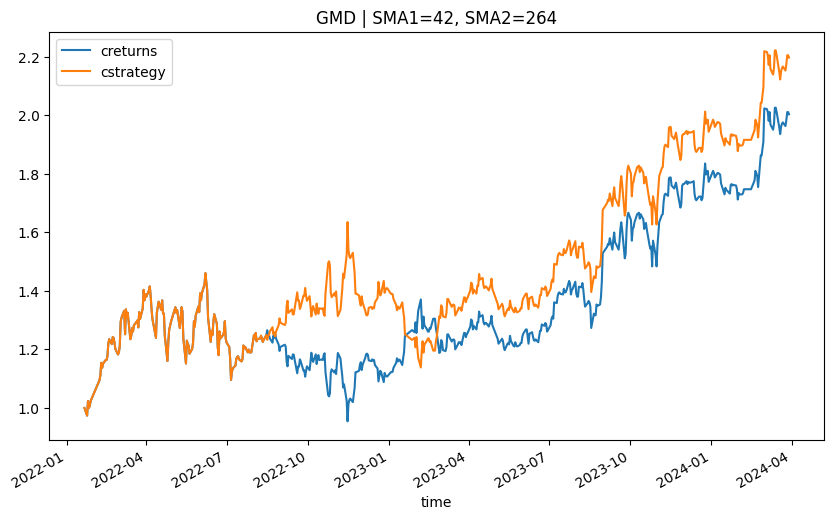

In [ ]:
smabt.plot_results()

> Giả định về phân phối chuẩn > sử dụng log return

### Chiến lược dựa vào Momentum

**Chiến lược động lượng**, một kỹ thuật phân tích được áp dụng rộng rãi trong giao dịch thuật toán, tập trung vào việc khai thác các xu hướng thị trường.

Nguyên tắc chính của phương pháp này là những tài sản hoặc chứng khoán đã thể hiện xu hướng giá cụ thể có khả năng duy trì xu hướng đó trong tương lai gần.

* Có hai loại chiến lược động lượng chính:

    * **Chiến lược động lượng đa mã (Cross-sectional momentum strategies)**:  Phương pháp này bao gồm việc lựa chọn một nhóm các công cụ tài chính và sau đó mua những tài sản gần đây có kết quả tốt hơn các tài sản khác cùng nhóm. Các nghiên cứu của Jegadeesh và Titman (1993, 2001) hay Chan và cộng sự (1996) tập trung phân tích loại chiến lược này và các nguồn lợi nhuận tiềm năng [1, 2, 3].

    * **Chiến lược động lượng chuỗi thời gian (Time series momentum strategies)**: Liên quan đến việc theo dõi lịch sử giá của một chứng khoán riêng lẻ và mua khi động lượng giá của nó đang tăng.  Nghiên cứu đáng chú ý thuộc về Moskowitz và cộng sự (2012), những người phân tích loại chiến lược này trên nhiều thị trường khác nhau [4]. Kết quả của họ đặt ra thách thức đối với giả thuyết “bước đi ngẫu nhiên" (random walk hypothesis), vốn đề xuất sự thiếu liên quan giữa biến động giá trong quá khứ và tương lai [4].

Chiến lược động lượng có thể được áp dụng sử dụng các chỉ báo kỹ thuật khác nhau, bao gồm:

* Đường trung bình động (Moving Averages)
* Chỉ số sức mạnh tương đối (RSI)

Ưu điểm của các chiến lược động lượng

* Tương đối đơn giản để triển khai: Những chiến lược này có thể được chuyển đổi thành các quy tắc giao dịch thuật toán dễ dàng.
Hiệu quả trong nhiều điều kiện thị trường: Chiến lược động lượng có thể mang lại lợi ích trong cả thị trường có xu hướng hoặc thị trường giằng co (range-bound).

Nhược điểm của chiến lược động lượng

* Dễ bị ảnh hưởng bởi Whipsaws: Whipsaw là thuật ngữ chỉ các trường hợp giá chứng khoán đảo chiều một cách đột ngột. Chiến lược động lượng có thể bỏ lỡ các đợt đảo chiều hoặc gây ra thua lỗ nếu gặp tình huống này.
Rủi ro tiềm ẩn: Về bản chất, chiến lược động lượng yêu cầu mua các tài sản đã tăng giá, dẫn đến khả năng rủi ro cao hơn.

In [ ]:
# prompt: Tắt các cảnh báo của Pandas

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# @title Chiến lược Momentum (Code)

# https://github.com/yhilpisch/py4at/blob/master/ch04/MomVectorBacktester.py
# Python Module with Class
# for Vectorized Backtesting
# of Momentum-based Strategies
#
# Python for Algorithmic Trading
# (c) Dr. Yves J. Hilpisch
# The Python Quants GmbH
#
import numpy as np
import pandas as pd


class MomVectorBacktester(object):
    ''' Class for the vectorized backtesting of
    Momentum-based trading strategies.

    Attributes
    ==========
    symbol: str
       RIC (financial instrument) to work with
    start: str
        start date for data selection
    end: str
        end date for data selection
    amount: int, float
        amount to be invested at the beginning
    tc: float
        proportional transaction costs (e.g. 0.5% = 0.005) per trade

    Methods
    =======
    get_data:
        retrieves and prepares the base data set
    run_strategy:
        runs the backtest for the momentum-based strategy
    plot_results:
        plots the performance of the strategy compared to the symbol
    '''

    def __init__(self, symbol, start, end, amount, tc, resolution='1D', asset_type='stock', source='TCBS'):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.amount = amount
        self.tc = tc
        self.resolution = resolution
        self.asset_type=asset_type
        self.source=source
        self.results = None
        self.get_data()


    def get_data(self):
        ''' Retrieves and prepares the data.
        '''
        # raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
        #                   index_col=0, parse_dates=True).dropna()
        # raw = pd.DataFrame(raw[self.symbol])

        raw =  stock_historical_data(symbol=self.symbol,
                                    start_date=self.start,
                                    end_date=self.end, resolution=self.resolution, type=self.asset_type, beautify=True, decor=False, source=self.source)
        raw['time'] = pd.to_datetime(raw['time'])
        raw.set_index('time', inplace=True)

        raw = raw[['close']].rename(columns={'close': 'price'})
        raw = raw.loc[self.start:self.end]
        raw['return'] = np.log(raw / raw.shift(1))
        self.data = raw

    def run_strategy(self, momentum=1):
        ''' Backtests the trading strategy.
        '''
        self.momentum = momentum
        data = self.data.copy().dropna()
        data['position'] = np.sign(data['return'].rolling(momentum).mean())
        data['strategy'] = data['position'].shift(1) * data['return']
        # determine when a trade takes place
        data.dropna(inplace=True)
        trades = data['position'].diff().fillna(0) != 0
        # subtract transaction costs from return when trade takes place
        data['strategy'][trades] -= self.tc
        data['creturns'] = self.amount * data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = self.amount * \
            data['strategy'].cumsum().apply(np.exp)
        self.results = data
        # absolute performance of the strategy
        aperf = self.results['cstrategy'].iloc[-1]
        # out-/underperformance of strategy
        operf = aperf - self.results['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)

    def plot_results(self):
        ''' Plots the cumulative performance of the trading strategy
        compared to the symbol.
        '''
        if self.results is None:
            print('No results to plot yet. Run a strategy.')
        title = '%s | TC = %.4f' % (self.symbol, self.tc)
        self.results[['creturns', 'cstrategy']].plot(title=title,
                                                     figsize=(10, 6))


if __name__ == '__main__':
    mombt = MomVectorBacktester(symbol='GMD', start='2018-01-02', end='2024-03-31',
                                amount=10_000_000, tc=0.002)
    print(mombt.run_strategy())
    print(mombt.run_strategy(momentum=2))

Time range is 2280 days. Looping through 7 requests
(35769740.49, 6338425.87)
(11730882.31, -17700432.31)


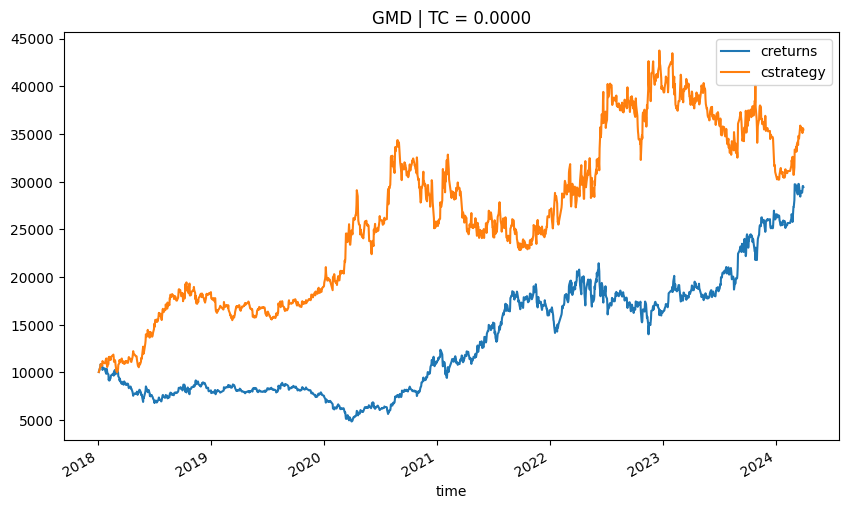

In [ ]:
mombt.plot_results()

Mô-đun Python này chứa một lớp được thiết kế cho việc kiểm tra ngược (backtesting) một cách vector hóa đối với các chiến lược giao dịch dựa trên động lượng (Momentum-based trading strategies).

### Cấu trúc và Cách hoạt động:

#### Các thuộc tính:
- `symbol`: Mã của công cụ tài chính để thực hiện kiểm tra.
- `start`: Ngày bắt đầu chọn dữ liệu.
- `end`: Ngày kết thúc chọn dữ liệu.
- `amount`: Số tiền được đầu tư ban đầu.
- `tc`: Chi phí giao dịch tỷ lệ (ví dụ: 0.2% = 0.002) cho mỗi giao dịch.
- `resolution`, `asset_type`, `source`: Các tham số để vnstock lấy dữ liệu cổ phiếu theo ngày

#### Các phương thức:
- `get_data()`: Lấy và chuẩn bị dữ liệu cơ bản.
- `run_strategy(momentum=1)`: Thực hiện kiểm tra ngược cho chiến lược dựa trên động lượng. Có thể chỉ định tham số `momentum` để thay đổi cách tính vị thế.
- `plot_results()`: Vẽ biểu đồ hiệu suất của chiến lược so với mã công cụ tài chính.

### Hoạt động cơ bản:

1. **Khởi tạo**: Khi tạo đối tượng của class, bạn cần cung cấp các thông tin như mã công cụ tài chính, khoảng thời gian dữ liệu, số tiền đầu tư, và chi phí giao dịch. Phương thức `get_data` sẽ được gọi tự động để lấy dữ liệu.

2. **Lấy Dữ liệu**: Phương thức `get_data` sẽ tải và chuẩn bị dữ liệu giá cả của công cụ tài chính được chỉ định, bao gồm việc tính toán lợi nhuận logarit.

3. **Chạy Chiến lược**: Phương thức `run_strategy` sử dụng dữ liệu đã được chuẩn bị để kiểm tra chiến lược giao dịch. Nó tính toán vị thế dựa trên lợi nhuận trung bình động của `momentum` và điều chỉnh cho chi phí giao dịch. Sau đó, nó tính toán hiệu suất tích lũy của chiến lược và so sánh với hiệu suất của công cụ tài chính.

4. **Vẽ Biểu Đồ Kết Quả**: Phương thức `plot_results` tạo biểu đồ để so sánh hiệu suất tích lũy của chiến lược với hiệu suất của công cụ tài chính.

### Ví dụ sử dụng:

Nếu chạy trực tiếp từ mô-đun (dùng `if __name__ == '__main__'` thường dùng trong file python .py để chạy chương trình - không cần thiết khi dùng trong Notebook), một thể hiện của `MomVectorBacktester` sẽ được tạo với các thông số đã định trước và thực hiện hai lần kiểm tra ngược với các giá trị `momentum` khác nhau, sau đó in ra kết quả.

Kết quả của việc chạy kiểm tra ngược chiến lược giao dịch dựa trên động lượng cho mã công cụ tài chính 'GMD' từ ngày 02/01/2018 đến ngày 31/03/2024 với số tiền đầu tư ban đầu là 10,000,000 đồng và chi phí giao dịch là 0.2% (0.002) được hiểu như sau:

1. **Khi `momentum` là 1**:
   - Hiệu suất tuyệt đối của chiến lược: 35,769,740.49 đồng. Điều này nghĩa là nếu áp dụng chiến lược này, tổng giá trị tài khoản cuối cùng sẽ là khoảng 35.77 triệu đồng.
   - Hiệu suất vượt trội/ thua kém so với việc giữ đầu tư mà không giao dịch: 6,338,425.87 đồng. Đây là lợi nhuận vượt trội so với việc đơn giản chỉ mua và giữ mã công cụ tài chính từ đầu đến cuối khoảng thời gian, sau khi đã trừ đi chi phí giao dịch.

2. **Khi `momentum` là 2**:
   - Hiệu suất tuyệt đối của chiến lược: 11,730,882.31 đồng. Với việc thay đổi tham số `momentum` thành 2, tổng giá trị tài khoản cuối cùng giảm xuống còn khoảng 11.73 triệu đồng.
   - Hiệu suất vượt trội/ thua kém so với việc giữ đầu tư mà không giao dịch: -17,700,432.31 đồng. Trong trường hợp này, chiến lược giao dịch đã không mang lại lợi ích mà thực tế đã mất thêm so với việc đơn giản là mua và giữ, kể cả khi đã trừ đi chi phí giao dịch.

Như vậy, với việc thay đổi giá trị `momentum`, hiệu suất của chiến lược giao dịch có sự biến động đáng kể. Trong trường hợp đầu tiên, chiến lược mang lại lợi nhuận tốt sau khi trừ đi chi phí giao dịch. Tuy nhiên, trong trường hợp thứ hai, việc điều chỉnh `momentum` đã không phát huy hiệu quả và thực tế dẫn đến kết quả kém hơn so với việc giữ đầu tư không giao dịch.



### Mean Reversion

> Chiến lược Mean Reversion (Trung bình cộng đảo ngược) dựa trên lý thuyết cho rằng giá tài sản và lợi nhuận lịch sử sẽ dần dần trở về mức trung bình dài hạn của chúng. Mức trung bình này có thể được xác định dựa trên nền kinh tế, ngành, hoặc lợi nhuận trung bình trong một tập dữ liệu cụ thể. Đây là một nguyên tắc cơ bản trong lĩnh vực tài chính, giả định rằng giá cả tài sản hoặc chỉ số thị trường, sau khi di chuyển một quãng đường xa từ mức giá trung bình, sẽ có xu hướng quay trở lại mức giá trung bình đó.

In [ ]:
# https://github.com/yhilpisch/py4at/blob/master/ch04/MRVectorBacktester.py
#
# Python Module with Class
# for Vectorized Backtesting
# of Momentum-based Strategies
#
# Python for Algorithmic Trading
# (c) Dr. Yves J. Hilpisch
# The Python Quants GmbH
#


class MRVectorBacktester(MomVectorBacktester):
    ''' Class for the vectorized backtesting of
    Mean Reversion-based trading strategies.

    Attributes
    ==========
    symbol: str
        RIC symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval
    amount: int, float
        amount to be invested at the beginning
    tc: float
        proportional transaction costs (e.g. 0.5% = 0.005) per trade

    Methods
    =======
    get_data:
        retrieves and prepares the base data set
    run_strategy:
        runs the backtest for the mean reversion-based strategy
    plot_results:
        plots the performance of the strategy compared to the symbol
    '''

    def run_strategy(self, SMA, threshold):
        ''' Backtests the trading strategy.
        '''
        data = self.data.copy().dropna()
        data['sma'] = data['price'].rolling(SMA).mean()
        data['distance'] = data['price'] - data['sma']
        data.dropna(inplace=True)
        # sell signals
        data['position'] = np.where(data['distance'] > threshold,
                                    -1, np.nan)
        # buy signals
        data['position'] = np.where(data['distance'] < -threshold,
                                    1, data['position'])
        # crossing of current price and SMA (zero distance)
        data['position'] = np.where(data['distance'] *
                                    data['distance'].shift(1) < 0,
                                    0, data['position'])
        data['position'] = data['position'].ffill().fillna(0)
        data['strategy'] = data['position'].shift(1) * data['return']
        # determine when a trade takes place
        trades = data['position'].diff().fillna(0) != 0
        # subtract transaction costs from return when trade takes place
        data['strategy'][trades] -= self.tc
        data['creturns'] = self.amount * \
            data['return'].cumsum().apply(np.exp)
        data['cstrategy'] = self.amount * \
            data['strategy'].cumsum().apply(np.exp)
        self.results = data
        # absolute performance of the strategy
        aperf = self.results['cstrategy'].iloc[-1]
        # out-/underperformance of strategy
        operf = aperf - self.results['creturns'].iloc[-1]
        return round(aperf, 2), round(operf, 2)


if __name__ == '__main__':
    mrbt = MRVectorBacktester('GDX', '2010-1-1', '2020-12-31',
                              10000, 0.0)
    print(mrbt.run_strategy(SMA=25, threshold=5))
    mrbt = MRVectorBacktester('GDX', '2010-1-1', '2020-12-31',
                              10000, 0.001)
    print(mrbt.run_strategy(SMA=25, threshold=5))
    mrbt = MRVectorBacktester('GLD', '2010-1-1', '2020-12-31',
                              10000, 0.001)
    print(mrbt.run_strategy(SMA=42, threshold=7.5))

(19031.64, 11851.65)
(18654.78, 11474.79)
(13104.59, 210.97)


## V. Thư viện Backtest

#### 5.1. Vectorbt

> [Vectorbt](https://vectorbt.dev/) là một gói phần mềm mã nguồn mở (có tuỳ chọn trả phí qua Donate) cho phép kiểm thử trong Python với cú pháp ngắn gọn và nhiều tuỳ chọn đa dạng đồng thời được tối ưu để đạt tốc độ thực thi ấn tượng.

Chương trình dưới đây mô phỏng việc kiểm thử một chiến lược giao dịch với các điều kiện sau:

1. Vốn ban đầu: 100 triệu VND
2. Mua khi giá đóng cửa cắt lên đường MA10 và chênh lệch giá đóng cửa so với MA10 ít nhất là 3%
3. Bán khi giá đóng cửa cắt lên đường MA10 và chênh lệch giá đóng cửa so với MA10 ít nhất là 3%

In [ ]:
!pip install -U vectorbt

In [ ]:
import vectorbt as vbt

price = candle_df['close']

# Giả sử vốn đầu tư 100M
pf = vbt.Portfolio.from_holding(price, init_cash=100_000)
pf.total_profit()

1243906.5108514188

In [ ]:
import vectorbt as vbt
import numpy as np
import pandas as pd
from numba import njit

# Calculate the 10-period simple moving average (SMA)
sma10 = vbt.MA.run(price, window=10).ma

# Define the conditions for the buy and sell signals
@njit
def generate_signals_nb(price, sma10): #nb viết tắt của numba
    entries = np.full(price.shape, False)
    exits = np.full(price.shape, False)

    for i in range(1, len(price)):
        if price[i] > sma10[i] and price[i] > (sma10[i] * 1.03):
            entries[i] = True
        if price[i] < sma10[i] and price[i] < (sma10[i] * 0.97):
            exits[i] = True

    return entries, exits

# Generate entries and exits using the Numba function
entries, exits = generate_signals_nb(price.values, sma10.values)

# Set the frequency of your price data
# Example: 'D' for daily data, 'H' for hourly data, etc.
freq = 'D'  # Adjust this based on your data frequency

# Run the backtest
pf = vbt.Portfolio.from_signals(price, entries, exits, init_cash=100_000, freq=freq)

# Print the total profit
print('Total Profit:', pf.total_profit())

# Print the summary of the portfolio
print(pf.stats())

Total Profit: 1615933.2746894138
Start                                2020-01-02 00:00:00
End                                  2024-05-24 00:00:00
Period                                1095 days 00:00:00
Start Value                                     100000.0
End Value                                 1715933.274689
Total Return [%]                             1615.933275
Benchmark Return [%]                         1243.906511
Max Gross Exposure [%]                             100.0
Total Fees Paid                                      0.0
Max Drawdown [%]                                31.69761
Max Drawdown Duration                  276 days 00:00:00
Total Trades                                          31
Total Closed Trades                                   30
Total Open Trades                                      1
Open Trade PnL                             106579.706502
Win Rate [%]                                   63.333333
Best Trade [%]                                 84.03669

In [ ]:
pf.plot().show()

### 5.2. Backtesting.py

> [Backtesting.py](https://kernc.github.io/backtesting.py/) là một framework Python được thiết kế để kiểm tra tính khả thi của các chiến lược giao dịch trên dữ liệu lịch sử (quá khứ). Tất nhiên, hiệu suất trong quá khứ không phải là dấu hiệu chắc chắn cho kết quả tương lai, nhưng một chiến lược tỏ ra có hiệu quả trải qua nhiều điều kiện thị trường khác nhau có thể sẽ tiếp tục đáng tin cậy với một chút may mắn trong tương lai. Được cải tiến dựa trên tầm nhìn của [Backtrader](https://www.backtrader.com/), trở nên vượt trội với các lựa chọn thay thế khác có sẵn, Backtesting.py nhẹ, sử dụng nhanh chóng, thân thiện với người dùng, trực quan, tương tác, thông minh và, hy vọng, sẽ không lỗi thời trong tương lai. Nó cũng được tài liệu hóa tốt, bao gồm một số hướng dẫn.

In [ ]:
!pip install backtesting

#### Hàm căn bản

##### Cross Over (Cắt lên)

In [ ]:
!pip install backtesting

In [ ]:
from backtesting.lib import crossover
candle_df.columns = [col.title() for col in candle_df.columns]
fast_period = 10
slow_period = 20
fast_sma = pta.sma(candle_df['Close'], fast_period)
slow_sma = pta.sma(candle_df['Close'], slow_period)

crossover(fast_sma, slow_sma)

False

#### Chiến lược căn bản với SMA

In [ ]:
candle_df.columns = [col.title() for col in candle_df.columns]

In [ ]:
# import
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA

# định nghĩa chiến thuật giao dịch mô phỏng
class SmaCross(Strategy):
    n1 = 50 # số ngày tính SMA ngắn hạn
    n2 = 200 # số ngày tính SMA dài hạn

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()

In [ ]:
bt = Backtest(candle_df, SmaCross,
              cash=100_000, commission=.003,
              exclusive_orders=True)

bt_stats = bt.run()
stats_df = pd.DataFrame({'Thống kê': bt_stats}) # bt_stats là numpy array, có thể tạo thành DataFrame cho dễ xử lý với Pandas đã học
stats_df #tearsheet

,Thống kê
Start,2020-01-02 00:00:00
End,2024-05-24 00:00:00
Duration,1604 days 00:00:00
Exposure Time [%],66.392694
Equity Final [$],329967.62419
Equity Peak [$],354933.64511
Return [%],229.967624
Buy & Hold Return [%],1243.906511
Return (Ann.) [%],31.619255
Volatility (Ann.) [%],55.474846


In [ ]:
bt_stats

Start                     2020-01-02 00:00:00
End                       2024-05-24 00:00:00
Duration                   1604 days 00:00:00
Exposure Time [%]                   66.392694
Equity Final [$]                 329967.62419
Equity Peak [$]                  354933.64511
Return [%]                         229.967624
Buy & Hold Return [%]             1243.906511
Return (Ann.) [%]                   31.619255
Volatility (Ann.) [%]               55.474846
Sharpe Ratio                         0.569975
Sortino Ratio                        1.173848
Calmar Ratio                         0.523517
Max. Drawdown [%]                  -60.397746
Avg. Drawdown [%]                   -9.385651
Max. Drawdown Duration      766 days 00:00:00
Avg. Drawdown Duration       57 days 00:00:00
# Trades                                    4
Win Rate [%]                             50.0
Best Trade [%]                     210.378996
Worst Trade [%]                    -28.516698
Avg. Trade [%]                    

| Metrics               | Vietnamese Name              | Meaning                                                                                   |
|-----------------------|------------------------------|-------------------------------------------------------------------------------------------|
| Start                 | Bắt đầu                      | Thời gian bắt đầu của quá trình backtesting.                                              |
| End                   | Kết thúc                     | Thời gian kết thúc của quá trình backtesting.                                             |
| Duration              | Thời lượng                   | Tổng thời gian của quá trình backtesting từ bắt đầu đến kết thúc.                         |
| Exposure Time [\%]     | Thời gian tiếp xúc [\%]       | Phần trăm thời gian mà chiến lược có vị thế mở trong thị trường so với tổng thời gian.    |
| Equity Final [\$]      | Vốn cuối cùng [\$]            | Giá trị tài khoản cuối cùng sau khi thực hiện backtesting.                                |
| Equity Peak [\$]       | Đỉnh vốn [\$]                 | Giá trị tài khoản cao nhất đạt được trong quá trình backtesting.                          |
| Return [%]            | Lợi nhuận [%]                | Phần trăm lợi nhuận tổng cộng từ chiến lược so với vốn ban đầu.                           |
| Buy & Hold Return [%] | Lợi nhuận Mua và Giữ [%]     | Phần trăm lợi nhuận nếu như chỉ mua và giữ cổ phiếu từ đầu đến cuối quá trình.             |
| Return (Ann.) [%]     | Lợi nhuận hàng năm [%]       | Phần trăm lợi nhuận hàng năm, tính trung bình dựa trên tổng thời gian của backtesting.     |
| Volatility (Ann.) [%] | Biến động hàng năm [%]       | Mức độ biến động của lợi nhuận hàng năm của chiến lược.                                   |
| Sharpe Ratio          | Tỷ số Sharpe                 | Đo lường hiệu quả lợi nhuận của chiến lược so với mức độ rủi ro.                          |
| Sortino Ratio         | Tỷ số Sortino                | Tương tự như Sharpe, nhưng chỉ tính toán biến động của lợi nhuận tiêu cực.                |
| Calmar Ratio          | Tỷ số Calmar                 | Tỷ lệ giữa lợi nhuận hàng năm và rút giảm tối đa.                                          |
| Max. Drawdown [%]     | Rút giảm tối đa [%]          | Mức giảm lớn nhất từ đỉnh đến đáy của tài khoản trước khi nó phục hồi đến một đỉnh mới.   |
| Avg. Drawdown [%]     | Rút giảm trung bình [%]      | Mức giảm trung bình của tài khoản.                                                        |
| Max. Drawdown Duration| Thời gian rút giảm tối đa    | Khoảng thời gian mà tài khoản ở mức giảm lớn nhất.                                        |
| Avg. Drawdown Duration| Thời gian rút giảm trung bình| Khoảng thời gian trung bình của các giai đoạn rút giảm.                                   |
| # Trades              | Số lần giao dịch             | Tổng số lần giao dịch được thực hiện trong quá trình backtesting.                         |
| Win Rate [%]          | Tỷ lệ thắng [%]              | Phần trăm số lần giao dịch thắng so với tổng số giao dịch.                                |
| Best Trade [%]        | Giao dịch tốt nhất [%]       | Phần trăm lợi nhuận cao nhất từ một giao dịch.                                            |
| Worst Trade [%]       | Giao dịch tồi tệ nhất [%]    | Phần trăm lỗ lớn nhất từ một giao dịch.                                                |
| Avg. Trade [%]        | Giao dịch trung bình [%]     | Lợi nhuận hoặc lỗ trung bình từ mỗi giao dịch.                                         |
| Max. Trade Duration   | Thời gian giao dịch tối đa   | Thời gian kéo dài nhất của một giao dịch từ mở đến đóng.                               |
| Avg. Trade Duration   | Thời gian giao dịch trung bình| Thời gian trung bình của mỗi giao dịch.                                                |
| Profit Factor         | Yếu tố lợi nhuận             | Tổng lợi nhuận từ các giao dịch thắng chia cho tổng lỗ từ các giao dịch thua.           |
| Expectancy [%]        | Kỳ vọng [%]                  | Lợi nhuận trung bình dự kiến từ mỗi giao dịch, dựa trên lịch sử giao dịch.              |
| SQN                   | SQN                         | System Quality Number - đánh giá chất lượng của chiến lược dựa trên tỷ lệ thắng và lợi nhuận. |
| _strategy             | Chiến lược                  | Tên của chiến lược giao dịch đang được đánh giá.                                       |
| _equity_curve         | Đường cong vốn              | Biểu đồ thể hiện sự thay đổi của giá trị tài khoản qua thời gian.                      |
| _trades               | Giao dịch                   | Chi tiết của từng giao dịch được thực hiện trong quá trình backtesting.                |


In [ ]:
bt.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:250: UserWarning:

DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1325', ...)

#### Tối ưu tham số

Notebook gốc từ Backtesting: [tại đây](https://colab.research.google.com/github/kernc/backtesting.py/blob/master/doc/examples/Parameter%20Heatmap%20%26%20Optimization.ipynb#scrollTo=26UU9phc3Tu7)

###### Tối ưu với randomized grid search

In [ ]:
from backtesting import Strategy
from backtesting.lib import crossover


class Sma4Cross(Strategy):
    n1 = 50
    n2 = 100
    n_enter = 20
    n_exit = 10

    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sma_enter = self.I(SMA, self.data.Close, self.n_enter)
        self.sma_exit = self.I(SMA, self.data.Close, self.n_exit)

    def next(self):

        if not self.position:

            # On upwards trend, if price closes above
            # "entry" MA, go long

            # Here, even though the operands are arrays, this
            # works by implicitly comparing the two last values
            if self.sma1 > self.sma2:
                if crossover(self.data.Close, self.sma_enter):
                    self.buy()

            # On downwards trend, if price closes below
            # "entry" MA, go short

            else:
                if crossover(self.sma_enter, self.data.Close):
                    self.sell()

        # But if we already hold a position and the price
        # closes back below (above) "exit" MA, close the position

        else:
            if (self.position.is_long and
                crossover(self.sma_exit, self.data.Close)
                or
                self.position.is_short and
                crossover(self.data.Close, self.sma_exit)):

                self.position.close()

In [ ]:
%%time

from backtesting import Backtest
# from backtesting.test import GOOG

# candle_df.iloc[:, :4] = candle_df.iloc[:, :4]/1000 # Chuyển giá về dạng đơn vị ngàn đồng
# backtest = Backtest(GOOG, Sma4Cross, commission=.002)
backtest = Backtest(candle_df, Sma4Cross, commission=.002)

stats, heatmap = backtest.optimize(
    n1=range(10, 110, 10),
    n2=range(20, 210, 20),
    n_enter=range(15, 35, 5),
    n_exit=range(10, 25, 5),
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    max_tries=200,
    random_state=0,
    return_heatmap=True)

Backtest.optimize:   0%|          | 0/3 [00:00<?, ?it/s]

CPU times: user 401 ms, sys: 68.3 ms, total: 469 ms
Wall time: 16.9 s


In [ ]:
heatmap

n1   n2   n_enter  n_exit
20   60   15       10        33018.95334
     80   15       10        30139.88742
     100  15       10        37079.92180
30   40   20       15        21107.40278
          25       15        18630.84816
                                ...     
100  200  15       10        89367.92418
          20       10        30178.88544
                   15        30722.09384
          25       10        24872.28238
          30       10        18156.87116
Name: Equity Final [$], Length: 177, dtype: float64

In [ ]:
heatmap.sort_values().iloc[-3:]

n1   n2   n_enter  n_exit
90   180  15       10        84556.35490
60   200  15       10        89150.52014
100  200  15       10        89367.92418
Name: Equity Final [$], dtype: float64

In [ ]:
hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm

n2,40,60,80,100,120,140,160,180,200
n1,,,,,,,,,
20,NaN,33018.953340,30139.887420,37079.921800,NaN,NaN,NaN,NaN,NaN
30,19869.12547,24969.787407,24233.945510,30984.167360,14367.241600,35209.340620,14440.098950,32960.094430,33656.495056
40,NaN,16749.499030,NaN,16251.159560,14118.145950,34432.326170,58204.785927,32940.775384,27105.978860
50,NaN,17036.792930,21145.852712,25019.534205,32149.572273,20565.820220,37327.545725,29454.085300,39575.316747
60,NaN,NaN,37760.879140,32654.940360,25497.124630,36551.164487,49305.884807,70327.384840,38389.119173
70,NaN,NaN,16986.878740,21130.361780,26891.295220,79067.210520,47555.627567,45993.656255,37832.726328
80,NaN,NaN,NaN,41054.301415,21972.914293,32113.282112,41953.078715,41258.430100,42662.614445
90,NaN,NaN,NaN,27404.413460,20207.603903,20011.520970,50519.629260,77441.869870,40515.633340
100,NaN,NaN,NaN,NaN,32651.260747,25977.396347,30779.187495,36313.975340,38659.611400


In [ ]:
!pip install vnstock_ezchart

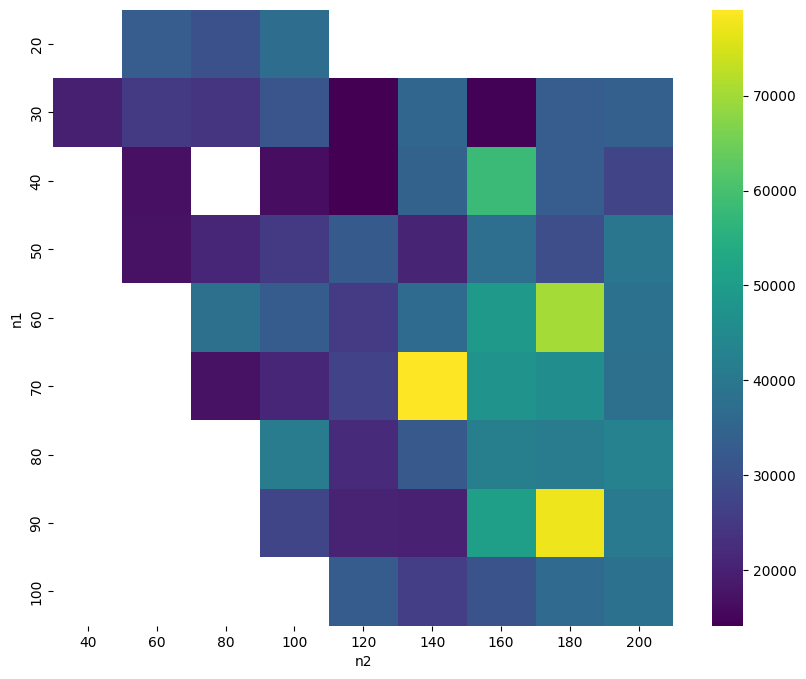

(<Figure size 1000x800 with 2 Axes>, <Axes: xlabel='n2', ylabel='n1'>)

In [ ]:
ezchart.heatmap(hm, cmap='viridis', figsize=(10,8))

In [ ]:
from backtesting.lib import plot_heatmaps


plot_heatmaps(heatmap, agg='mean')

GridPlot(id='p1626', ...)

###### Tối ưu với Scikit

In [ ]:
%%capture

! pip install scikit-optimize  # This is a run-time dependency

In [ ]:
%%time

stats_skopt, heatmap, optimize_result = backtest.optimize(
    n1=[10, 100],      # Note: For method="skopt", we
    n2=[20, 200],      # only need interval end-points
    n_enter=[10, 40],
    n_exit=[10, 30],
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    method='skopt',
    max_tries=200,
    random_state=0,
    return_heatmap=True,
    return_optimization=True)

Backtest.optimize:   0%|          | 0/200 [00:00<?, ?it/s]

CPU times: user 34.3 s, sys: 398 ms, total: 34.7 s
Wall time: 1min 9s


In [ ]:
heatmap.sort_values().iloc[-3:]

n1  n2   n_enter  n_exit
57  101  11       10        60734.99058
78  200  15       14        71508.44878
62  184  26       22        98334.08538
Name: Equity Final [$], dtype: float64

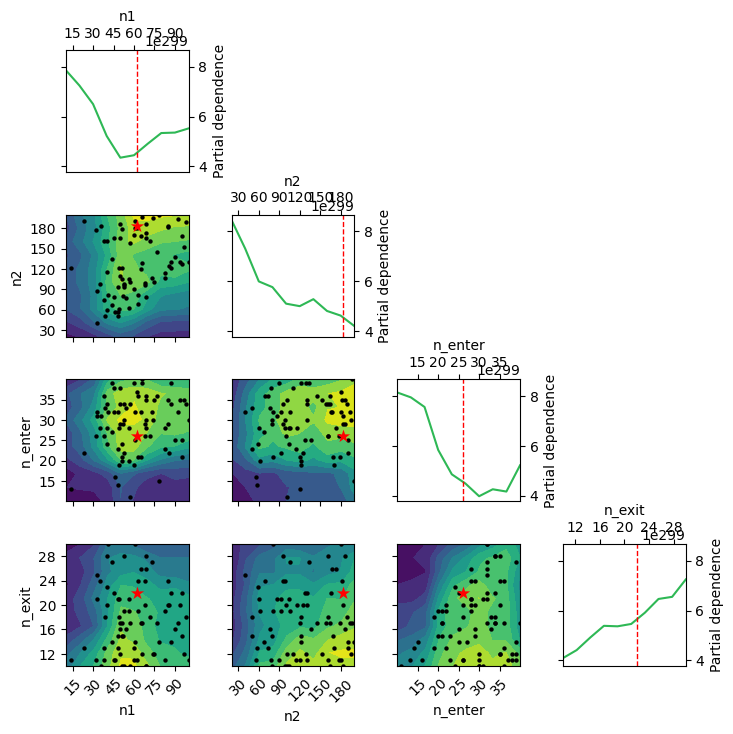

In [ ]:
from skopt.plots import plot_objective

_ = plot_objective(optimize_result, n_points=10)

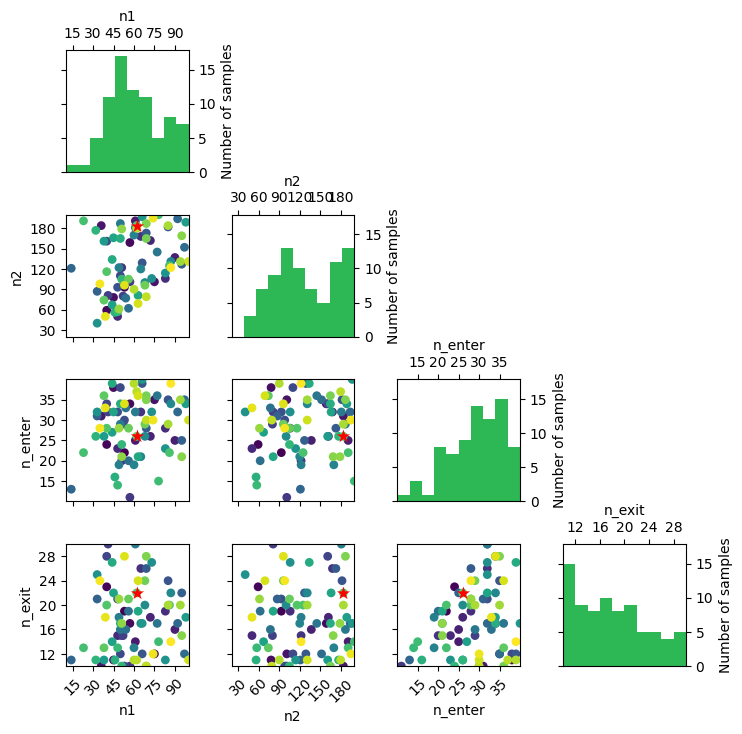

In [ ]:
from skopt.plots import plot_evaluations

_ = plot_evaluations(optimize_result, bins=10)

### 5.3. Vnstock Backtest Engine

> Chương trình dưới đây đang trong giai đoạn thử nghiệm sau khi thiết lập xong cấu trúc và ghép nối các tính năng. Thịnh giới thiệu để các bạn hình dung cách thức xây dựng một chương trình thực tế.

In [ ]:
import os
from google.colab import userdata
os.environ['ACCESS_KEY'] = userdata.get('private_rep_key')

!cp "/content/drive/MyDrive/Python Chứng khoán K6/private_backtest.sh" /content/backtest.sh
!chmod +x backtest.sh
%cd /content/
!./backtest.sh

In [ ]:
from backtest_engine.data.data_loader import DataLoader

data, index_data = DataLoader(symbol="FRT",
                              start='2022-01-02', end='2024-06-20',
                              interval='1D', index_symbol='VNINDEX', source='VCI').get_data()
data

2024-06-23 08:46:49,747 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS
2024-06-23 08:46:51,633 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


,open,high,low,close,volume
time,,,,,
2022-01-04,56.51,56.74,54.45,54.45,2197800
2022-01-05,53.70,56.74,53.02,53.87,1543900
2022-01-06,53.07,53.65,50.15,50.15,3625100
2022-01-07,48.20,50.89,47.40,50.89,2288900
2022-01-10,52.38,52.38,48.20,49.18,1284200
...,...,...,...,...,...
2024-06-14,176.40,176.50,173.70,174.00,793700
2024-06-17,174.40,175.00,170.50,175.00,718800
2024-06-18,173.90,174.00,172.00,172.90,539100


Chi tiết về chiến lược đã được định nghĩa trong ví dụ này:

1. Vốn ban đầu: 100 triệu VND
2. Mua khi giá đóng cửa cắt lên đường MA10 và chênh lệch giá đóng cửa so với MA10 ít nhất là 3%
3. Bán khi giá đóng cửa cắt lên đường MA10 và chênh lệch giá đóng cửa so với MA10 ít nhất là 3%


In [ ]:
import pandas as pd
from backtest_engine.strat.base_strategy import Strategy
from backtest_engine.signal.operator import SignalOperator
from backtest_engine.plot.visualize import BacktestChart

class PriceSMAWithTrailingStrategy(Strategy):
    def __init__(self, data: pd.DataFrame, index_data: pd.DataFrame,
                 sma_period: int = 10, trailing_step: float = 0.03,
                 initial_capital: float = 100000.0, fee_pct: float = 0.005, tax_pct: float = 0.01,
                 buy_at: str = 'close', sell_at: str = 'close', min_lot_size: int = 100, stats_mode: str = 'gross', theme:str='dark'):

        super().__init__(data, index_data, initial_capital, buy_at, sell_at, fee_pct, tax_pct, min_lot_size, stats_mode, theme)
        self.sma_period = sma_period
        self.trailing_step = trailing_step

    def generate_signals(self):
        """
        Generate trading signals based on Price vs. SMA with trailing step.
        """
        # Calculate moving average
        sma_series = self.indicator.sma(length=self.sma_period)
        self.signals[f'sma{self.sma_period}'] = sma_series

        # Calculate price percentage difference from SMA
        price_vs_sma_pct = ((self.data[self.buy_at] - sma_series) / sma_series) * 100
        self.signals['price_vs_sma_pct'] = price_vs_sma_pct
        crossover = SignalOperator.crossover(self.data[self.buy_at], sma_series)
        crossunder = SignalOperator.crossunder(self.data[self.buy_at], sma_series)
        above_threshold = SignalOperator.above(price_vs_sma_pct, self.trailing_step * 100)
        below_threshold = SignalOperator.below(price_vs_sma_pct, -self.trailing_step * 100)

        self.signals['crossover'] = crossover
        self.signals['crossunder'] = crossunder
        self.signals['above_threshold'] = above_threshold
        self.signals['below_threshold'] = below_threshold

        # Initialize state variables
        monitoring_long = False
        monitoring_short = False

        for i in range(len(self.signals)):
            if crossover.iloc[i]:
                monitoring_long = True
            if crossunder.iloc[i]:
                monitoring_short = True

            if monitoring_long and above_threshold.iloc[i]:
                self.open_order(self.signals.index[i])
                monitoring_long = False  # reset the state

            if monitoring_short and below_threshold.iloc[i]:
                self.close_order(self.signals.index[i])
                monitoring_short = False  # reset the state

    def _plot_results(self):
        bt_chart = BacktestChart(data=self.data, signals=self.signals, trades=self.trades, theme='dark')
        return bt_chart.trades_price_sma_crossover(sma_periods=self.sma_period, title='FRT - Price SMA Crossover Srategy')

In [ ]:
# from backtest_engine.strat.price_sma import PriceSMAWithTrailingStrategy

strategy = PriceSMAWithTrailingStrategy(data=data, index_data=index_data,
                                        sma_period=10,
                                        trailing_step=0.03,
                                        initial_capital=100_000, fee_pct=0.02/100, tax_pct=1/100,
                                        stats_mode='gross')
strategy.run_backtest()
report = strategy.get_performance()

print(report)

Start                      2022-01-28 00:00:00
End                        2024-06-20 00:00:00
Period                       874 days 00:00:00
Start Value                             100000
End Value                           214330.294
Total Return [%]                    114.330294
Max Drawdown [%]                    -42.621913
Volatility                            0.480624
Sharpe Ratio                          1.169133
Sortino Ratio                         5.262367
Calmar Ratio                          1.318838
Value at Risk                        -0.091216
Hold Annual Return [%]               43.315431
Hold Latest Return [%]               248.38838
Hold Volatility                        0.41975
Hold Sharpe Ratio                     1.060835
Hold Sortino Ratio                    2.316861
Hold Calmar Ratio                     1.045203
Hold Value at Risk                    -0.12651
# Trades                                    37
Avg. Trade Duration                  22.694444
Max. Trade Du

In [ ]:
strategy.signals

,close,signal,positions,action,sma10,price_vs_sma_pct,crossover,crossunder,above_threshold,below_threshold
time,,,,,,,,,,
2022-01-04,54.45,0,0,Hold,NaN,NaN,False,False,False,False
2022-01-05,53.87,0,0,Hold,NaN,NaN,False,False,False,False
2022-01-06,50.15,0,0,Hold,NaN,NaN,False,False,False,False
2022-01-07,50.89,0,0,Hold,NaN,NaN,False,False,False,False
2022-01-10,49.18,0,0,Hold,NaN,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2024-06-14,174.00,0,0,Hold,172.14,1.080516,False,False,False,False
2024-06-17,175.00,0,0,Hold,172.58,1.402248,False,False,False,False
2024-06-18,172.90,0,0,Hold,172.77,0.075245,False,False,False,False


In [ ]:
strategy.trades

,action,price,position,cash,unrealized,total_capital,gain,loss,fee,tax,accumulate_gain,accumulate_loss,gross_returns,net_returns,hold_returns
time,,,,,,,,,,,,,,,
2022-01-28,Long,50.26,1900.0,4486.9012,95494.0,99980.9012,0.0,0.0,19.0988,0.00,0.0,0.0,NaN,NaN,NaN
2022-03-08,Short,69.29,0.0,134795.0610,0.0,134795.0610,36157.0,0.0,26.3302,1316.51,36157.0,0.0,0.378631,0.364569,0.378631
2022-03-16,Long,78.18,1700.0,1862.4798,132906.0,134768.4798,0.0,0.0,26.5812,0.00,36157.0,0.0,NaN,NaN,0.128301
2022-04-08,Short,84.65,0.0,144299.6488,0.0,144299.6488,10999.0,0.0,28.7810,1439.05,47156.0,0.0,0.082758,0.071714,0.082758
2022-04-14,Long,94.74,1500.0,2161.2268,142110.0,144271.2268,0.0,0.0,28.4220,0.00,47156.0,0.0,NaN,NaN,0.119197
2022-04-22,Short,88.49,0.0,133542.3298,0.0,133542.3298,0.0,9375.0,26.5470,1327.35,47156.0,9375.0,-0.065970,-0.075497,-0.065970
2022-05-25,Long,69.81,1900.0,876.8020,132639.0,133515.8020,0.0,0.0,26.5278,0.00,47156.0,9375.0,NaN,NaN,-0.211097
2022-06-14,Short,77.66,0.0,146925.7512,0.0,146925.7512,14915.0,0.0,29.5108,1475.54,62071.0,9375.0,0.112448,0.101101,0.112448
2022-06-17,Long,88.02,1600.0,6065.5848,140832.0,146897.5848,0.0,0.0,28.1664,0.00,62071.0,9375.0,NaN,NaN,0.133402


In [ ]:
strategy._plot_results()

ECharts(Grid)

# IV. Paper trading

## Selenium on Colab

Sử dụng thư viện `colab_toolbox` dưới đây do Thịnh viết để cài đặt các công cụ phổ biến dùng trong khoá học thay vì copy/code phức tạp. Chi tiết: https://github.com/thinh-vu/colab_toolbox

In [ ]:
!pip install colab_toolbox
from colab_toolbox import ColabInstall

ColabInstall('selenium')

Source: https://nariyoo.com/python-how-to-run-selenium-in-google-colab/

In [ ]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

In [ ]:
# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

driver.get("https://tuoitre.vn/")
print(driver.title)
print(driver.current_url)
# print(driver.page_source)
# driver.quit()

Báo Tuổi Trẻ - Tin tức mới nhất, tin nhanh, tin nóng 24h
https://tuoitre.vn/


In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

## SSI paper trade

> Bạn có thể sử dụng tài khoản giả lập (Paper Trading) bằng cách chọn [Giao dịch giả lập](https://papertrading.ssi.com.vn/trading) của SSI từ giao diện iBoard (góc phải trên cùng) sau đó chấp nhận điều khoản & điều kiện sử dụng để bắt đầu.

![](https://course.learn-anything.vn/wp-content/uploads/2024/03/SSI_paper_trading_switch.png)

![](https://course.learn-anything.vn/wp-content/uploads/2024/03/SSI-Paper-Trading.png)

![](https://course.learn-anything.vn/wp-content/uploads/2024/03/Colab-Secrets-Paper-Trading.png)

In [ ]:
from google.colab import userdata
account_id = userdata.get('USR')
passwords = userdata.get('PWD')

In [ ]:
# @title Paper Trading Client
import pytest
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
# from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC

class TestLoginfirst():
  def setup_method(self, method):
    chrome_options = Options()
    user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
    chrome_options.add_argument(f'user-agent={user_agent}')
    chrome_options.add_argument("--headless")  # Specify the headless option
    chrome_options.add_argument("--no-sandbox")  # Add this line if you're running on a Linux environment to avoid issues
    chrome_options.add_argument("--disable-dev-shm-usage")  # Add this line to avoid shared memory issues
    chrome_options.add_argument('--window-size=1920,1080')
    self.driver = webdriver.Chrome(options=chrome_options)
    self.vars = {}

  def teardown_method(self, method):
    self.driver.quit()

  def test_loginfirst(self, username, passwords):
    self.driver.get('https://accounts.ssi.com.vn/login?clientId=eemqwodwtxPt&redirectUri=https://papertrading.ssi.com.vn/auth/verify&language=vi')
    print(self.driver.title)
    # Login process
    self.driver.find_element(By.ID, "txt-username").send_keys(username)
    self.driver.find_element(By.ID, "txt-password").send_keys(passwords)
    self.driver.find_element(By.ID, "txt-username").click()
    self.driver.find_element(By.ID, "txt-password").click()
    self.driver.find_element(By.CSS_SELECTOR, ".form-actions:nth-child(3) > .btn-login").click()

    # self.driver.get("https://papertrading.ssi.com.vn/")
    WebDriverWait(self.driver, 20).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "#headlessui-menu-button-\:r7\: > span"))) # need to specify the element id

    # wait until page loaded successfully



    # Extract and print cookies
    cookies = self.driver.get_cookies()

    for item in cookies:
      if item['domain'] == '.ssi.com.vn' and item['name'] == 'token':
        token = item['value']
        # if token is not None and is string, print Loggin successfully
        assert isinstance(token, str)
        print("Loggin successfully")
    return token

In [ ]:
# run the test
driver = TestLoginfirst()
driver.setup_method(driver)
token = driver.test_loginfirst(account_id, passwords)
driver.teardown_method(driver)

CTCP Chứng khoán SSI - Đăng nhập
Loggin successfully


Ở bước trên, chương trình thực hiện thao tác điều khiển trình duyệt Chrome ở chế độ Headless (chạy nền, không hiển thị giao diện đồ họa) trên Google Colab và mô phỏng lại quá trình đăng nhập với User Name và Password. Sau khi đăng nhập thành công, trình duyệt mở link Paper Trading và tạo ra mã token để tiếp tục truy vấn, đặt lệnh như thông thường qua API với request mà ta quen thuộc.

![](https://course.learn-anything.vn/wp-content/uploads/2024/03/Paper_Trading_Python_Client_Visual_Note_2024-03-30-22.57.30.excalidraw.png)

In [ ]:
# @title Account balance
ssi_headers = {
  'authority': 'iboard-tapi.ssi.com.vn',
  'accept': 'application/json, text/plain, */*',
  'accept-language': 'vi',
  # 'authorization': f'Bearer {token}',
  'dnt': '1',
  'origin': 'https://papertrading.ssi.com.vn',
  'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"',
  'sec-fetch-dest': 'empty',
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

import requests
import pandas as pd

def get_account_balance(account_id, token, headers=ssi_headers):
    """
    Fetches the account balance for a given account ID.

    Parameters:
    - account_id (str): The account identifier, e.g., "743156".
    - token (str): Authentication token for the session.
    - headers (dict, optional): Additional headers for the request. If provided, it should not include 'Authorization' key as it will be added.

    Returns:
    - pandas.DataFrame: A DataFrame containing the account balance data if the request is successful.
    - None: If the request fails or an error occurs.
    """
    # Prepare the URL for the request
    url = f"https://iboard-tapi.ssi.com.vn/demo-trading/account-balance?account={account_id}-SC01"

    headers["Authorization"] = f"Bearer {token}"

    try:
        # Make the GET request
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raises HTTPError for bad responses

        # Process the successful response
        data = response.json().get('data', [])
        if data:
            df = pd.DataFrame(data, index=[0])
            return df
        else:
            print("No data found for the given parameters.")
            return None
    except requests.exceptions.HTTPError as e:
        print(f"HTTP Error: {e.response.text}")
    except requests.exceptions.RequestException as e:
        print(f"Request Error: {e}")
    except ValueError:
        print("JSON decode error")
    return None

accoutn_info = get_account_balance (account_id, token)

In [ ]:
# @title Account Info
# Dữ liệu mẫu như sau: Ở đây Thịnh loại bỏ thông tin số tài khoản mà chỉ hiển thị lại đúng định dạng dữ liệu trả về của thao tác bên trên
accoutn_info = pd.DataFrame({'account': {0: 'R00102-SC01'},
 'cashBal': {0: 500000000},
 'cashOnHold': {0: 0},
 'withdrawable': {0: 500000000},
 'receivingCashT1': {0: 0},
 'receivingCashT2': {0: 0},
 'matchedBuyVolume': {0: 0},
 'matchedSellVolume': {0: 0},
 'unmatchedBuyVolume': {0: 0},
 'unmatchedSellVolume': {0: 0},
 'paidCashT1': {0: 0},
 'paidCashT2': {0: 0},
 'cia': {0: 0},
 'debt': {0: 0},
 'purchasingPower': {0: 500000000},
 'totalAsset': {0: 500000000}})

accoutn_info

,account,cashBal,cashOnHold,withdrawable,receivingCashT1,receivingCashT2,matchedBuyVolume,matchedSellVolume,unmatchedBuyVolume,unmatchedSellVolume,paidCashT1,paidCashT2,cia,debt,purchasingPower,totalAsset
0,R00102-SC01,500000000,0,500000000,0,0,0,0,0,0,0,0,0,0,500000000,500000000


In [ ]:
# @title Sức mua
def get_max_buysell(symbol, price, side, account_id, token, headers=None):
    """
    Get the max buy/sell power for a specific stock symbol based on your account balance.

    Parameters:
    - symbol (str): Stock symbol to query, e.g., "SSI".
    - price (int or float): Price per unit for the stock, e.g., 35000.
    - side (str): 'B' for Buy or 'S' for Sell.
    - account_id (str): Account identifier, e.g., "123456".
    - token (str): Authentication token for the session.
    - headers (dict, optional): Additional headers for the request. Must include authorization headers if required.

    Returns:
    - pandas.DataFrame: A DataFrame containing the max buy/sell power data.
    - None: If the request fails or an error occurs.
    """
    # Ensure headers is a dictionary; add token if headers not provided
    if headers is None:
        headers = {"Authorization": f"Bearer {token}"}
    else:
        headers["Authorization"] = f"Bearer {token}"

    url = "https://iboard-tapi.ssi.com.vn/demo-trading/max-buy-sell"
    params = {
        "stockSymbol": symbol,
        "account": f"{account_id}-SC01",
        "price": price,
        "type": side
    }

    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()  # Raises HTTPError for bad responses (4XX or 5XX)

        data = response.json().get('data', [])
        if data:
            df = pd.DataFrame(data, index=[0])
            return df
        else:
            print("No data found for the given parameters.")
            return None
    except requests.exceptions.HTTPError as e:
        print(f"HTTP Error: {e.response.text}")
    except requests.exceptions.RequestException as e:
        print(f"Request Error: {e}")
    except ValueError:
        print("JSON decode error")
    return None

# GỌI HÀM LẤY DỮ LIỆU
get_max_buysell (symbol='SSI', price='35000', side='B', account_id=account_id, token=token)

,maxBuyQty,purchasingPower
0,42800,1500000000


In [ ]:
# @title Nạp tiền ảo
import json

def money_topup (account_id, token, is_der_account=False, headers=ssi_headers):
    """
    Nạp tiền ảo vào TK giả lập
    """
    url = "https://iboard-tapi.ssi.com.vn/demo-trading/common/cash-dw"
    headers["Authorization"] = f"Bearer {token}"
    payload = json.dumps({
                        "account": f"{account_id}-SC01",
                        "type": "D",
                        "isDerAccount": is_der_account
                        })

    response = requests.request("POST", url, headers=headers, data=payload)
    if response.status_code == 200:
        print(response.json())

# Gọi hàm
money_topup (account_id, token)

In [ ]:
# @title Danh sách vị thế

def get_stock_position(account_id, token, headers=ssi_headers):
    """
    Fetches the stock position for a given account ID.

    Parameters:
    - account_id (str): The account identifier, e.g., "743156".
    - token (str): Authentication token for the session.
    - headers (dict, optional): Additional headers for the request. If provided, it should not include 'Authorization' key as it will be added.

    Returns:
    - dict: A dictionary containing the stock position data if the request is successful.
    - None: If the request fails or an error occurs.
    """
    url = f"https://iboard-tapi.ssi.com.vn/demo-trading/stock-position?account={account_id}-SC01"

    # Ensure headers is a dictionary and include the Authorization token

    headers["Authorization"] = f"Bearer {token}"

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Raises HTTPError for bad responses
        # Assuming the response data is JSON and directly usable
        data = response.json()['data']
        df = pd.DataFrame(data)
        return df
    except requests.exceptions.HTTPError as e:
        print(f"HTTP Error: {e.response.text}")
    except requests.exceptions.RequestException as e:
        print(f"Request Error: {e}")
    except ValueError:
        print("JSON decode error")
    return None


# gọi hàm
get_stock_position(account_id, token)

,totalMarketValue,stockPositions,account,totalCost


# V. Trading API

* SSI Fast Connect API: https://docs.vnstock.site/integrate/ssi_fast_connect_api/ hoặc hướng dẫn kết nối từ SSI: https://guide.ssi.com.vn/ssi-products/v/tieng-viet/fastconnect-trading
* DNSE: https://docs.vnstock.site/integrate/dnse_api/

# VI. Telegram Bot

Hướng dẫn chính thức: https://docs.vnstock.site/integrate/telegram-slack-gui-tin-nhan-thong-bao-qua-chat-tu-python/#telegram

Hướng dẫn tham khảo thêm
---
* Tạo bot Telegram: https://thinhvu.com/2021/04/11/tao-alert-bot-telegram-chi-phi-facebook-ad/
* Alert bot: https://thinhvu.com/2021/04/11/tao-alert-bot-telegram-chi-phi-facebook-ad/

Demo sử dụng Lark Suite Bot Builder làm công cụ đẩy tin nhắn

In [ ]:
# webhook url có dạng như này
webhook_url = 'https://botbuilder.larksuite.com/api/trigger-webhook/3e659439afe94d8354887bfacc5280d9'

In [ ]:
# prompt: send a post request with sample message to webhook_url

import requests

# Sample message
message = {
    "msg_type": "text",
    "content": {
        "text": "Hello, world!"
    }
}

# Send the POST request
response = requests.post(webhook_url, json=message)

# Check the response status code
if response.status_code == 200:
    print("Message sent successfully")
else:
    print(f"Error sending message: {response.status_code}")


Message sent successfully
